<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;a:link{color: white}">
    <h1 style='color:GhostWhite;'>Should This Loan be Approved or Denied ?</h1>

An XGBoost data model to predict whether a loan can be approved or denied.
    </div>

<div class="alert alert-block alert-success">  
    <b>Dataset Source</b><br><br>
    <a href="https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied">U.S. Small Business Administration (SBA) Dataset</a>
<br><br>
    All information about the dataset can be found at the <b>above link</b><br><br>    
    *<i>Thanks to Hamza for his <a href="https://www.kaggle.com/code/hamzaghanmi/xgboost-hyperparameter-tuning-using-optuna/notebook">Notebook on Optuna</a> which was used as a guide.</i> 
<br><br>
    If interested, Data Exploratory Visualization in Tableau can also be seen at :<br>
    <a href= "https://public.tableau.com/app/profile/joseph8038/viz/SBADatasetVisualizationandAnalysis/SBADatasetVisualizationandAnalysis-StoryBoard">SBA Data Exploratory Visualization in Tableau</a>
</div>

<div class="alert alert-block alert-info" style="color:DarkSlateBlue">
This notebook is divided into 4 main parts:<br>
<ul>
<li><a style="color:DarkSlateGrey;" href="#part1"><b>Part 1: Pipeline</b></a> - this is the end result encapsulated into a pipeline</li><br>
<li><a style="color:DarkSlateGrey" href="#part2"><b>Part 2: Data Exploration (EDA) and Preparation, Modeling, Metrics</b></a> - from start to end, with some notes</li><br>
<li><a style="color:DarkSlateGrey;" href="#part3"><b>Part 3: XGBoost HyperParameter Tuning using Optuna</b></a></li><br>
<li><a style="color:DarkSlateGrey;" href="#part4"><b>Part 4: Miscellaneous</a></b>  - Early Stopping Rounds, Random Forest Classifier</li>
</ul><br>
"Our model results are way more dependent on how well feature engineering is performed than on the model itself. Machine Learning models are like very skilled linguists that can decipher any text in any language. However, it will not be helpful if they are handed a bunch of scribbles or blurred out text. EDA should not be skipped, as a thorough EDA and feature engineering process accounts for 90% of the results of a good model."<br><br>
One method of avoiding memory leaks is doing processing inside a function. It creates a new scope for the intermediate variables and removes them automatically when the interpreter exits the function; hence, most of the code below are encapsulated into functions for this purpose. 
</div>

<h2>Table Of Contents</h2>
<ul>
    <li><a style="color:DarkSlateGrey" href="#paths_and_flags">Paths and Flags</a></li>
    <li><a style="color:DarkSlateGrey" href="#libraries">Libraries</a></li>   
    <li><a style="color:DarkSlateGrey" href="#functions">Custom Functions And Classes</a></li>
    <li><a style="color:DarkSlateGrey" href="#metrics">Metrics Function</a></li>
    <li><a style="color:DarkSlateGrey" href="#xgboost_class">XGBoost Class</a></li>
    <li><a style="color:DarkSlateGrey" href="#other_models">Other Models Class</a></li>
    <li><a style="color:DarkSlateGrey" href="#optuna_class">Optuna Class</a></li><br>
    <li><a style="color:DarkSlateGrey" href="#part1">Part 1. PipeLine</a></li>
    <ul>
        <li><a style="color:DarkSlateGrey" href="#pl_classes">Pipeline Classes</a></li>
        <li><a style="color:DarkSlateGrey" href="#load_pl_df">Load Dataset for PipeLine</a></li>
        <li><a style="color:DarkSlateGrey" href="#pl_run">Run the pipeline</a></li>
    </ul>
    <br>
    <li><a style="color:DarkSlateGrey" href="#part2">Part 2. Data Exploration and Preparation, Modeling, Metrics</a></li>
    <ul>
        <li><a style="color:DarkSlateGrey" href="#de_load_df">Load Dataset</a></li>
        <li><a style="color:DarkSlateGrey" href="#dep">Data Exploration / Preparation</a></li>
        <li><a style="color:DarkSlateGrey" href="#build_model">Build Model Using XGBoost</a></li>
        <ul>
            <li><a style="color:DarkSlateGrey" href="#model1">Model v1</a></li>
            <li><a style="color:DarkSlateGrey" href="#oversample">Oversample</a></li>
            <ul>
                <li><a style="color:DarkSlateGrey" href="#model2">Model v2</a></li>
                <li><a style="color:DarkSlateGrey" href="#model3">Model v3</a></li>
            </ul>
        </ul>
        <li><a style="color:DarkSlateGrey" href="#test_model">Test Model</a></li>
        <ul>
            <li><a style="color:DarkSlateGrey" href="#test_test_dataset">Test Model With Test Dataset</a></li>
           <li><a style="color:DarkSlateGrey" href="#test_user_input">Test Model With User Input</a></li>
        </ul>
        <li><a style="color:DarkSlateGrey" href="#mutual_info">Mutual Information Scores</a></li>
        <li><a style="color:DarkSlateGrey" href="#trim_datasets">Trim Datasets</a></li>
        <li><a style="color:DarkSlateGrey" href="#results1">Full or Trimmed Dataset</a></li>
    </ul>  
    <br>
    <li><a style="color:DarkSlateGrey" href="#part3">Part 3. XGBoost HyperParameter Tuning using Optuna</a></li>
    <ul>
    <li><a style="color:DarkSlateGrey" href="#find_best_hp">Find The Best HyperParameter Combination</a></li>
    <li><a style="color:DarkSlateGrey" href="#try_best_hp">Model v4 : Try the Optuna Hyperparameters</a></li>
    <li><a style="color:DarkSlateGrey" href="#optuna_results">Optuna Tuning Results</a></li>
    <li><a style="color:DarkSlateGrey" href="#cross_validation">Cross Validation</a></li>
    </ul>
    <br>
    <li><a style="color:DarkSlateGrey" href="#part4">Part 4. Miscellaneous</a></li>
    <ul>
    <li><a style="color:DarkSlateGrey" href="#early_stopping_rounds">Early Stopping Rounds</a></li>
    <li><a style="color:DarkSlateGrey" href="#random_forest_classifier">Random Forest Classifier</a></li>
    </ul>
</ul>

<a id="paths_and_flags"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Paths and Flags</b></div>

In [200]:
'''
Change this kaggle_flag to :
   0 - if running outside Kaggle (e.g. Jupyter Notebook), change filepath & savepath to your 
       own path
   1 - if running as a Kaggle notebook
'''
kaggle_flag = 0

# alert_flag - change to 0 for no sound alert, 1 for sound alert after long running cells
alert_flag = 1

# switch to 1 if using GPU
gpu_flag = 0

#---------------------------------------------------------------------------------------#

if kaggle_flag == 1:
    filepath = "../input/should-this-loan-be-approved-or-denied/"  # Kaggle
    savepath = "./"   #Kaggle
    final_ds = '../input/sba-final-csv-feather-20220402/sba_final.csv.feather' 
else:
    filepath = "C:\\Python\\Python_Data_Science_Exercises\\datasets\\"
    savepath = "C:\\Python\\Python_Data_Science_Exercises\\datasets\\"
    final_ds = f'{savepath}sba_final.csv.feather'

audio_path="https://www.soundjay.com/misc/sounds/tablet-bottle-1.mp3" # for alert

if gpu_flag == 0:
    tree_method = 'hist'
else:
    tree_method = 'gpu_hist'

<a id="libraries"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Libraries</b></div>

In [201]:
piplist = !pip list

# for text-to-speech
if not piplist.grep('pyttsx3'):
    !pip3 install pyttsx3
    
# for oversampling
if not piplist.grep('imbalanced-learn'):
    !pip3 install imbalanced-learn

if not piplist.grep('xgboost'):
    !pip3 install xgboost
    
if not piplist.grep('optuna'):
    !pip3 install optuna

# for saving file in feather format
if not piplist.grep('pyarrow'):
    !pip3 install pyarrow
    
# for EDA 
if not piplist.grep('pandas-profiling'):
    !pip3 install pandas-profiling
    
if not piplist.grep('sweetviz'):
    !pip3 install sweetviz
    
if not piplist.grep('dataprep'):
    !pip3 install dataprep

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pyttsx3
from IPython.display import Audio, display
from IPython.display import FileLink
from IPython.display import IFrame
from IPython.core.display import HTML
import hashlib
import copy      # for deepcopy()
import datetime as dt
import optuna
import gc
from pandas_profiling import ProfileReport
import sweetviz as sv
import shutil
from pprint import pprint
%matplotlib inline  

<a id="functions"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Custom Functions and Classes</b></div>

In [203]:
class color:
    purple = '\033[95m'
    cyan = '\033[96m'
    darkcyan = '\033[36m'
    blue = '\033[94m'
    green = '\033[92m'
    yellow = '\033[93m'
    red = '\033[91m'
    bold = '\033[1m'
    underline = '\033[4m'
    end = '\033[0m'
    bdunl = '%s%s' % (bold, underline)
    bdblue = '%s%s' % (bold, blue)
    bdgreen = '%s%s' % (bold, green)
    bdred = '%s%s' % (bold, red)

In [204]:
''' 
Set up voice object.  Used in different areas of notebook to indicate completion of long processes.
'''
if kaggle_flag == 0:   # not Kaggle
    engine = pyttsx3.init()  # object creation

    """ RATE"""
    #rate = engine.getProperty('rate')   # getting details of current speaking rate
    #print (rate)                        #printing current voice rate
    engine.setProperty('rate', 175)     # setting up new voice rate

    """VOLUME"""
    #volume = engine.getProperty('volume')   #getting to know current volume level (min=0 and max=1)
    #print (volume)                         #printing current volume level
    engine.setProperty('volume',0.7)        # setting up volume level  between 0 and 1

    """VOICE"""
    voices = engine.getProperty('voices')       #getting details of current voice
    #engine.setProperty('voice', voices[0].id)  #changing index, changes voices. o for male
    engine.setProperty('voice', voices[1].id)   #changing index, changes voices. 1 for female

In [205]:
# copy from corochann (Kaggle Grandmaster) notebook 
# https://www.kaggle.com/code/corochann/ashrae-feather-format-for-fast-loading/notebook

from pandas.api.types import is_datetime64_any_dtype as is_datetime

def reduce_mem_usage(df, use_float16=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        if is_datetime(df[col]):
            # skip datetime type
            continue
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min >= np.iinfo(np.uint8).min and c_max <= np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and \
                            c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print()
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [206]:
def check_cols_with_nulls(df):
    cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
    if len(cols_with_missing) == 0:
        print("No Missing Values")
    else:
        print(cols_with_missing)
    
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [207]:
def check_infinity_nan(df,dfname):
    print("checking for infinity")
  
    #ds = sba.isin([np.inf, -np.inf])
    #print(ds)
  
    # printing the count of infinity values
    print()
    print("printing the count of infinity values")
  
    count = np.isinf(df).values.sum()
    print(f"{dfname} contains {str(count)} infinite values")
    print()
    
    has_nan = df.isnull().values.any()
    print(f"Does {dfname} have Nan or Null values ?  {has_nan}")

In [208]:
# used as a converter when loading csv
def fixvals(val):
    retval = val.replace('$','').replace(',','')
    return retval

In [209]:
## I could also use the jupyter notebook magic cell %%time
def runtime(rt1,rt2):
    tdiff=rt2 - rt1
    # get seconds and convert to h:m:s
    print()
    print(f'Runtime : {str(dt.timedelta(seconds=tdiff.total_seconds()))}')

In [210]:
def create_download_link(title = "Download ", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title + filename,filename=filename)
    return HTML(html)

<a id="metrics"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Metrics Function</b></div>

In [211]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def model_eval(y_valid,predictions, cmDisplay='False'):
    print('MAE:', metrics.mean_absolute_error(y_valid, predictions))
    #print('MSE:', metrics.mean_squared_error(y_valid, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))
    print()
    
    ClassificationReport = classification_report(y_valid,predictions.round(),output_dict=True)

    print(f'{color.bold}Classification Report:{color.end}')
    print(classification_report(y_valid,predictions.round()))
    
    print()
    print(f"{color.bold}Confusion Matrix:{color.end}")

    if cmDisplay == True:
        cm = confusion_matrix(y_valid, predictions)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        fig, ax = plt.subplots(dpi=100,figsize=(5,5))
        disp.plot(ax=ax,colorbar=False,values_format='d')
    
    cmv = confusion_matrix(y_valid, predictions)
    
    TrueNeg = cmv[0][0]
    FalsePos = cmv[0][1]
    FalseNeg = cmv[1][0]
    TruePos = cmv[1][1]

    TotalNeg = TrueNeg + FalseNeg
    TotalPos = TruePos + FalsePos
    
    print()
    print(f'True Negative : CHGOFF (0) was predicted {TrueNeg} times correctly \
  ({round((TrueNeg/TotalNeg)*100,2)} %)')
    print(f'False Negative : CHGOFF (0) was predicted {FalseNeg} times incorrectly \
    ({round((FalseNeg/TotalNeg)*100,2)} %)')
    print(f'True Positive : P I F (1) was predicted {TruePos} times correctly \
    ({round((TruePos/TotalPos)*100,2)} %)')
    print(f'False Positive : P I F (1) was predicted {FalsePos} times incorrectly \
    ({round((FalsePos/TotalPos)*100,2)} %)')
    
    print()
    asm = (accuracy_score(y_valid, predictions.round()) * 100)
    print(f'{color.bdgreen}Accuracy for model: %.2f{color.end}' % asm)
    print(f'{color.bdblue}f1-score: {color.end}')
    print(f"   CHGOFF (0) : {round(ClassificationReport['0']['f1-score']*100,2)}")
    print(f"   P I F (1)  : {round(ClassificationReport['1']['f1-score']*100,2)}")
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))
    
    return {'cmv':cmv, 'ClassificationReport':ClassificationReport, 'AccuracyScore':asm}

**Feature Importance**

In [212]:
from xgboost import plot_importance

# Plot feature importance
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize,dpi=600)
    return plot_importance(booster=booster, ax=ax)

**Mutual Information**

In [213]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    print()
    print("Please wait, Mutual Information gathering can take time ...")
    X = X.copy()
    #for colname in X.select_dtypes(["object", "category"]):
    #    X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    #discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    #mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = mutual_info_regression(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    print("Mutual Information gathering done ...")
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

<a id="xgboost_class"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>XGBoost Class</b></div>

In [214]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split
#from xgboost import XGBRegressor
from xgboost import XGBClassifier

class process_model():  
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.X_train, self.y_train = None, None
        self.X_valid, self.X_test = None, None
        self.y_valid, self.y_test = None, None

        print(f'MIS_Status Count ->  1 : {Counter(y)[1]}, 0 : {Counter(y)[0]}')
    
    # oversampling method
    def osample(self):
        # define oversampling strategy
        oversample = RandomOverSampler(sampling_strategy='minority') 
        print('X size : ', len(self.X))
        print('y size : ', len(self.y))
        # fit and apply the transform
        X_over, y_over = oversample.fit_resample(self.X, self.y)

        # summarize class distribution
        print(f'Before Oversampling -> 1 : {Counter(self.y)[1]}, 0 : {Counter(self.y)[0]}')
        print(f'After Oversampling  -> 1 : {Counter(y_over)[1]}, 0 : {Counter(y_over)[0]}')
        
        # update X and y with the oversampled results 
        self.X = X_over
        self.y = y_over
        
        # return the oversampled results in case they are needed in another module
        return {'X_over':X_over, 'y_over':y_over}
    
    def split_data(self, X_size = 0.7):   
        # Split Data into Train:Validate:Test
        
        # train_size=X_size
        # In the first step, we will split the data in training and remaining dataset
        self.X_train, X_rem, self.y_train, y_rem = train_test_split(self.X, self.y, \
                                                        train_size = X_size, random_state=48) 

        # Now since we want the valid and test size to be equal,
        # we have to define valid_size=0.5 (that is 50% of remaining data)
        # test_size = 0.5

        self.X_valid, self.X_test, self.y_valid, self.y_test = train_test_split(X_rem,y_rem,\
                                                            test_size=0.5, random_state=48)
    
        print()
        print(f'{color.bdunl}Shapes Before And After Splitting Dataset :{color.end}')
        print('X',self.X.shape,end=''), print('   y', self.y.shape)
        print('X_train',self.X_train.shape,end=''), print('   y_train', self.y_train.shape)
        print('X_valid',self.X_valid.shape,end=''), print('   y_valid', self.y_valid.shape)
        print('X_test', self.X_test.shape, end=''), print('   y_test', self.y_test.shape)
        
        return {'X_train':self.X_train, 'y_train':self.y_train, \
                'X_valid':self.X_valid, 'y_valid':self.y_valid, \
                'X_test':self.X_test, 'y_test':self.y_test}
    
    # Method to run model 
    # desc - description of metrics report
    def prep_run_model(self, desc='Metrics', cmDisplay=False, PipeLine_flag = False,\
                hyperparams = {'n_estimators': 1000, 'learning_rate': 0.05, 'max_depth': 6, \
                               'tree_method':tree_method}):
        print()
        print(f"{color.bold}Please wait, Fitting model can take time ...{color.end}")
        
        '''
        XGBRegressor is for continuous target/outcome variables. These are often called 
        "regression problems."

        XGBClassifier is for categorical target/outcome variables. These are often called 
        "classification problems."
        
        xg_model = XGBRegressor(n_estimators = self.mn_estimators, \
                                learning_rate = self.mlearning_rate, \
                                max_depth = self.mmax_depth,\
                                n_jobs=4)
        
        xg_model = XGBClassifier(n_estimators = self.mn_estimators, \
                                learning_rate = self.mlearning_rate, \
                                max_depth = self.mmax_depth,\
                                use_label_encoder =False,\
                                n_jobs=4)
        '''
        
        if PipeLine_flag == True:
            # hyperparams is a result of Optuna hyperparameter tuning (Part 3 of this notebook)
             
            '''
            hyperparams = {'lambda': 0.0011260613527792323,
                           'alpha': 0.18307583898121738,
                           'colsample_bytree': 0.5,
                           'subsample': 0.8,
                           'learning_rate': 0.02,
                           'max_depth': 11,
                           'random_state': 48,
                           'min_child_weight': 1,
                           'n_estimators': 4000,
                           'tree_method': tree_method}
            '''
            hyperparams = { 'alpha': 0.0046540057600720115,
                            'colsample_bytree': 0.5,
                            'lambda': 0.10810295148897421,
                            'learning_rate': 0.05,
                            'max_depth': 15,
                            'min_child_weight': 1,
                            'random_state': 48,
                            'subsample': 0.8,
                            'n_estimators': 4000,
                            'tree_method': tree_method}

        xg_model = XGBClassifier(**hyperparams,use_label_encoder =False, n_jobs=4)
       
        eval_setparam = [(self.X_train, self.y_train), (self.X_valid, self.y_valid)]
        
        xg_model.fit(self.X_train, self.y_train, 
                     early_stopping_rounds=400,             # 10% of n_estimators
                     eval_metric=['error','logloss'],
                     #eval_set=[(X_valid, y_valid)], 
                     eval_set = eval_setparam,
                     verbose=False)
 
        print("Fitting model completed.")
        print()
        print('Preparing Predictions')
    
        # Get predictions
        predictions = xg_model.predict(self.X_valid)
    
        print()
        print(f'{color.underline}{desc}{color.end}')

        eval_results = model_eval(self.y_valid, predictions, cmDisplay)
            
        # Return these values as they will be needed for further testing or metrics
        # in dictionary form to remember easier 
        return {'xg_model':xg_model,'predictions':predictions, \
                    'X_train':self.X_train, 'y_train':self.y_train, \
                    'X_valid':self.X_valid, 'y_valid':self.y_valid, \
                    'X_test':self.X_test, 'y_test':self.y_test, 'eval_results':eval_results}

<a id="other_models"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Other Models Class</b></div>

In [216]:
from sklearn.ensemble import RandomForestClassifier

# inherit from XGBoost class (process_model)
class other_models(process_model):  
    def __init__(self, X, y):
        self.X = X
        self.y = y

        print(f'MIS_Status Count ->  1 : {Counter(y)[1]}, 0 : {Counter(y)[0]}')
    
    # Method to run model 
    # desc - description of metrics report
    def prep_run_model(self, desc='Metrics', modelname = 'rfc',\
                       hparams = {'n_estimators':600, 'random_state':48, 'max_depth':10},\
                       cmDisplay=False):
        print()
        print(f"{color.bold}Please wait, Fitting model can take time ...{color.end}")  

        if modelname == 'rfc':
            model = RandomForestClassifier(**hparams) 
            model.fit(self.X_train, self.y_train)
            
        print("Fitting model completed.")
        print()
        print('Preparing Predictions')
    
        # Get predictions
        predictions = model.predict(self.X_valid)
    
        print()
        print(f'{color.underline}{desc}{color.end}')

        eval_results = model_eval(self.y_valid, predictions, cmDisplay)
            
        # Return these values as they will be needed for further testing or metrics
        # in dictionary form to remember easier 
        return {'model':model,'predictions':predictions, \
                    'X_train':self.X_train, 'y_train':self.y_train, \
                    'X_valid':self.X_valid, 'y_valid':self.y_valid, \
                    'X_test':self.X_test, 'y_test':self.y_test, 'eval_results':eval_results}

<a id="optuna_class"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Optuna Class</b></div>

In [241]:
class optuna_tuning(process_model):  
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
        self.X_train, self.y_train = None, None
        self.X_valid, self.X_test = None, None
        self.y_valid, self.y_test = None, None

    def objective(self, trial):
        param = {
            # tree_method would ideally be gpu_hist for faster speed
            'tree_method':tree_method, 
            # L2 regularization weight, Increasing this value will make model more conservative
            'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
            # L1 regularization weight, Increasing this value will make model more conservative
            'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
            # sampling according to each tree
            'colsample_bytree': trial.suggest_categorical('colsample_bytree', \
                            [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
            # sampling ratio for training data
            'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
            'learning_rate': trial.suggest_categorical('learning_rate', \
                            [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02,0.05]),
            'n_estimators': 4000,
            # maximum depth of the tree, signifies complexity of the tree
            'max_depth': trial.suggest_categorical('max_depth', [6,7,9,11,13,15,17,20]),
            'random_state': trial.suggest_categorical('random_state', [48]),
            # minimum child weight, larger the term more conservative the tree
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 300)
        } 
        
        # print(param)  # for debugging, comment out if desired
        model = XGBClassifier(**param, use_label_encoder = False)  
        '''
        model.fit(dfsets['X_train'], dfsets['y_train'],\
                  eval_set=[(dfsets['X_valid'],dfsets['y_valid'])],early_stopping_rounds=400,\
                  verbose=False,eval_metric=['logloss'])
    
        preds = model.predict(dfsets['X_valid'])
    
        rmse = metrics.mean_squared_error(dfsets['y_valid'], preds, squared = False)
        '''
        
        model.fit(self.X_train, self.y_train,\
                  eval_set=[(self.X_valid, self.y_valid)],early_stopping_rounds=400,\
                  verbose=False,eval_metric=['logloss'])
    
        preds = model.predict(self.X_valid)
    
        rmse = metrics.mean_squared_error(self.y_valid, preds, squared = False)
        gc.collect()
        
        return rmse

    #def run_optuna_trials(self, n_trials = None, timeout = None, dfsets = None):
    def run_optuna_trials(self, n_trials = None, timeout = None):
        print(f"{color.bold}Please wait, finding best trial ...{color.end}")

        study = optuna.create_study(direction='minimize') 
        
        study.optimize(self.objective,\
                       n_trials, timeout,\
                       gc_after_trial=True, catch=(RuntimeWarning,ArithmeticError,))

        print('Number of completed trials:', len(study.trials))
        print('Best trial:', study.best_trial.params)
        
        return study

<a id="part1"></a>
<div style="font-family: Trebuchet MS;background-color:DarkRed;color:AliceBlue;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
<h1 id="part1" style='color:GhostWhite;'>Part 1. Pipeline</h1>
This pipeline handles both X and y
</div>

<a id="pl_classes"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>PipeLine Classes</b></div>

In [218]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
  
class PL_Object():
    def __init__(self,X,y):
        #store X and Y
        self.X=X
        self.y=y

class PreProcessor(BaseEstimator, TransformerMixin):
    def __init__(self,operation= 'X'):
        self.operation=operation
    @staticmethod
    def enabled(**kwargs):
        return True

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # check the parameters and return X and y inside the object
        X_data=X.X
        y_data=X.y
        
        print()
        print(f'{color.bdunl}PreProcessor initiated for {self.operation}{color.end}')
        
        #  do some work and assign it back to the X object which contains both X and y data
        if self.operation=='X':
            '''
            # NOTE: 'MIS_Status' is the target (y), but still in X, as we need to drop rows
                    with NaNs. We cannot do it separately, as there will be a mismatch in count 
                    of rows.  At the end of this procedure, we separate the new target data from X 
                    and update y.
            '''
            
            # Drop Na from rows
            #---------------------
            print(f'{color.bdblue}Drop Na{color.end}')
            X_data.dropna(subset=['DisbursementDate', 'NewExist', 'City', 'State',\
                        'LowDoc', 'Name', 'NAICS', 'CreateJob', 'RetainedJob', 'FranchiseCode',\
                        'UrbanRural', 'NoEmp', 'Term', 'MIS_Status'], how='any', inplace=True)
            
            # drop invalid classifications
            print('   Drop invalid classifications')
            X_data = X_data[(X_data['LowDoc'] == 'Y') | (X_data['LowDoc'] == 'N')]
            
            X_data = X_data[(X_data['NewExist'] == 1) | (X_data['NewExist'] == 2)]   
            
            # Trim leading and trailing spaces
            #---------------------------------
            print('   Trim leading and trailing spaces, if any')
            X_data['City'] = X_data['City'].str.strip()
            
            # Change dtype for columns needed for calculation or string extraction 
            #------------------------------------------------------------------------
            print(f'{color.bdgreen}Change dtype for columns needed for calculation or string extraction{color.end}')
            X_data = X_data.astype({'DisbursementGross':np.float64,'SBA_Appv':np.float64,\
                              'GrAppv':np.float64, 'ChgOffPrinGr':np.float64,\
                              'NAICS':np.str_, 'NewExist':np.int8})
            
            # Drop Duplicate Rows
            #------------------------------------------------------------------------
            print(f'{color.bdblue}Drop Duplicate Rows{color.end}')
            dupl_series = X_data.duplicated()
            num_of_dupl = len(X_data[dupl_series == True])
            if num_of_dupl > 0:
                X_data.drop_duplicates(inplace=True)
        
            # Create New Features
            #-----------------------
            print(f'{color.bdblue}Create New Features{color.end}')
            X_data['Industry'] = X_data['NAICS'].str[0:2]
            X_data = X_data.astype({'Industry':np.int8})
            
            X_data['Recession'] = np.where((X_data['DisbursementDate'] >= '2007-09-01')\
                     & (X_data['DisbursementDate'] <= '2009-06-30'), 1, 0)
            
            X_data['RealEstate'] = np.where(X_data['Term'] >= 240, 1, 0)
            
            X_data['SBA_Portion']=(X_data['SBA_Appv']/X_data['GrAppv']) * 100
            
            X_data["CityState"] = X_data["City"] + "_" + X_data["State"]
            
            print()
            print(f"X length = {len(X_data)}")
            print(f"Y length = {len(X_data['MIS_Status'])}")
            
            # Update X object
            X.X = X_data                      # type DataFrame
            X.y = X_data.pop('MIS_Status')    # type series
            
        elif self.operation=='y':
            pass                      
        else:
            pass
        
        #return modified X object
        return X
    

class EncodeCategorical(BaseEstimator, TransformerMixin):
    def __init__(self,operation= 'X'):
        self.operation=operation
    @staticmethod
    def enabled(**kwargs):
        return True

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # encode categorical features and return X and y inside the object
        X_data=X.X
        y_data=X.y
        
        print()
        print(f'{color.bdunl}Encode Categorical Features initiated for {self.operation}{color.end}')
        
        #  do some work and assign it back to the X object
        if self.operation=='X':         
            X_data['LowDoc'] = np.where((X_data['LowDoc'] == 'Y'), 1, 0)
            
            len_data=len(X_data)
            #cols_to_drop = []
            hash_constant = 900000   # fixed value so we can programmatically reproduce the hash
            #for col in X_data.columns:
            for col in X_data[['State','CityState']]:
                if X_data[col].dtype == 'object':
                    print(f'Column {col} has {X_data[col].nunique()} values among {len_data}')

                    if X_data[col].nunique() < 25:
                        print(f'One-hot encoding of {col}')
                        one_hot_cols = pd.get_dummies(X_data[col])
                        for ohc in one_hot_cols.columns:
                            X_data[col + '_' + ohc] = one_hot_cols[ohc]
                    else:
                      print(f'Hashing of {col}')
                      X_data[col + '_hash'] = X_data[col].apply(lambda row: int(hashlib.sha1((col +\
                                "_" + str(row)).encode('utf-8')).hexdigest(), 16) % hash_constant)

            X.X = X_data
            
        elif self.operation=='y':
            y_data = np.where(y_data == 'P I F', 1, 0)
            
            y_data = y_data.astype(np.int8)
            
            # convert back to series
            y_data = pd.Series(y_data)

            X.y = y_data                      
        else:
            pass
        #return modified X
        return X    

class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self,operation= 'X'):
        self.operation=operation
    @staticmethod
    def enabled(**kwargs):
        return True

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_data=X.X
        
        print()
        print(f'{color.bdunl}Drop Columns initiated for {self.operation}{color.end}')
        
        #  do some work and assign it back to the X object
 
        # Dropping 'City' as 'CityState_hash' is more ideal
        # Zip code has invalid values like 1, 2.  If we pad 0000 to 1, it's still not correct,
        # as state should be Alaska. Zip code 1 is different states in the dataset
        cols_to_drop = ['LoanNr_ChkDgt', 'Zip', 'Bank', 'BankState', 'ApprovalDate', \
                        'ApprovalFY', 'ChgOffDate', 'BalanceGross', 'NAICS', 'ChgOffPrinGr', \
                        'Name', 'RevLineCr', 'DisbursementDate', 'City', 'State', 'CityState',\
                        'GrAppv']

        X_data.drop(columns=cols_to_drop, inplace=True)
            
        print()
        print('Unneeded Columns Dropped')
        
        # reduce mem usage of X_data as final step
        X_data = reduce_mem_usage(X_data)
        
        print()
        print(X_data.info())

        X.X = X_data
            
        #return modified X
        return X    

class XGBoost(BaseEstimator, TransformerMixin):
    def __init__(self,operation= 'X'):
        self.operation=operation
    @staticmethod
    def enabled(**kwargs):
        return True

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_data=X.X
        y_data=X.y
        
        print()
        print(f'{color.bdunl}XGBoost initiated{color.end}')
        #print(len(X_data))
        #print(len(y_data))
        
        # Get predictions using training and validation data
        xg_model_run = process_model(X_data, y_data)
        xg_model_run.osample()
        xg_model_run.split_data(0.7)
        xg_model_run_results = xg_model_run.prep_run_model("Train/Valid Data Metrics",\
                                                          cmDisplay=True, PipeLine_flag = True)   
        
        #Test with unseen data
        print()
        print(f'{color.bdunl}Test With Unseen Data X_test and y_test{color.end}')
        
        xg_model = xg_model_run_results['xg_model']
        x_test = xg_model_run_results['X_test']
        y_test = xg_model_run_results['y_test']
        
        # Get predictions
        predictions = xg_model.predict(x_test)
        cmv = model_eval(y_test, predictions)

        X.X = X_data
            
        '''
        A dictionary is returned, and its values can be used outside the pipeline if needed
        
        {'xg_model':xg_model,'predictions':predictions, \
                    'X_train':X_train, 'y_train':y_train, \
                    'X_valid':X_valid, 'y_valid':y_valid, \
                    'X_test':X_test, 'y_test':y_test, 'cmv':cmv}
        '''
        return xg_model_run_results

<a id="load_pl_df"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Load Dataset for PipeLine</b></div>

In [219]:
X = pd.read_csv(f'{filepath}SBAnational.csv',\
                 converters = {'DisbursementGross':fixvals,'SBA_Appv':fixvals,\
                              'GrAppv':fixvals, 'ChgOffPrinGr':fixvals}, \
                              parse_dates=['DisbursementDate'], low_memory=False)
print("Shape of original SBA dataset : ", X.shape)
print()
print(X[['DisbursementGross','SBA_Appv','GrAppv','ChgOffPrinGr','DisbursementDate']].head(2))

# Filter data to before 2011
X = X[X['DisbursementDate'] <= '2010-12-31']

print()
print(f"Size of data after 2010-12-31 : \
    {len(X[X['DisbursementDate'] > '2010-12-31'])}")
print()
print(f"Size of data before 2011 : \
    {len(X[X['DisbursementDate'] < '2011-01-01'])}")

'''
X still contains the target 'MIS_Status', as we have to drop rows 
with NaNs in the pipeline. "MIS_Status" will be separated from X later in the pipeline

Select target - y is initialized as it goes into the pipeline, but will be updated in the pipeline 
after preprocessing.  Others preprocess y outside the pipeline; here, y will be preprocessed in
the pipeline.
'''
y = X['MIS_Status']

Shape of original SBA dataset :  (899164, 27)

  DisbursementGross   SBA_Appv     GrAppv ChgOffPrinGr DisbursementDate
0         60000.00   48000.00   60000.00         0.00        1999-02-28
1         40000.00   32000.00   40000.00         0.00        1997-05-31

Size of data after 2010-12-31 :     0

Size of data before 2011 :     876993


In [220]:
#Assign X and y to the object
My_Object=PL_Object(X,y)
My_Object.X.head(2)

LoanNr_ChkDgt                         Name        City State    Zip  \
0     1000014003               ABC HOBBYCRAFT  EVANSVILLE    IN  47711   
1     1000024006  LANDMARK BAR & GRILLE (THE)   NEW PARIS    IN  46526   

               Bank BankState   NAICS ApprovalDate ApprovalFY  ...  RevLineCr  \
0  FIFTH THIRD BANK        OH  451120    28-Feb-97       1997  ...          N   
1   1ST SOURCE BANK        IN  722410    28-Feb-97       1997  ...          N   

   LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  BalanceGross  \
0       Y         NaN        1999-02-28          60000.00         $0.00    
1       Y         NaN        1997-05-31          40000.00         $0.00    

   MIS_Status ChgOffPrinGr     GrAppv   SBA_Appv  
0       P I F        0.00   60000.00   48000.00   
1       P I F        0.00   40000.00   32000.00   

[2 rows x 27 columns]

<a id="pl_run"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Run the pipeline</b></div>


PreProcessor initiated for X
Drop Na
   Drop invalid classifications
   Trim leading and trailing spaces, if any
Change dtype for columns needed for calculation or string extraction
Drop Duplicate Rows
Create New Features

X length = 868663
Y length = 868663

Encode Categorical Features initiated for X
Column State has 51 values among 868663
Hashing of State
Column CityState has 43153 values among 868663
Hashing of CityState

Encode Categorical Features initiated for y

Drop Columns initiated for X

Unneeded Columns Dropped
Memory usage of dataframe is 91.13 MB

Memory usage after optimization is: 38.11 MB
Decreased by 58.2%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868663 entries, 0 to 899163
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               868663 non-null  int16  
 1   NoEmp              868663 non-null  int16  
 2   NewExist           868663 non-null  uint8  
 3   Crea

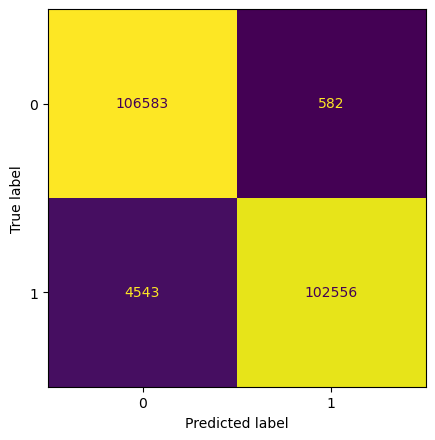

In [221]:
%%time

def RunPipeLine():
    rt1=dt.datetime.now()
    #Assign X and y to the object
    My_Object=PL_Object(X,y)

    #Build a simple pipeline

    My_Pipeline=Pipeline([('X Prep',PreProcessor('X')),
                          ('X EnCat',EncodeCategorical('X')),
                          ('y EnCat',EncodeCategorical('y')),
                          ('DropCols',DropColumns()),
                          ('XGBoost',XGBoost())
                         ])

    My_Object=My_Pipeline.transform(My_Object)

    print()
    print(f'{color.bdred}These results were obtained using Optuna tuning{color.end}')
    
    print()
    print(f'{color.bold}Pipeline Process Completed.{color.end}')

    rt2=dt.datetime.now()
    runtime(rt1,rt2)
    print()
    
    return My_Object        # for further usage below
    
MyObject = RunPipeLine()

<div class="alert alert-block alert-info" style="color:DarkSlateBlue">
    <b>Just for informative reasons</b>, below shows how we can use data (dictionary) passed back by the pipeline to My_Object
    </div>      

dict_keys(['xg_model', 'predictions', 'X_train', 'y_train', 'X_valid', 'y_valid', 'X_test', 'y_test', 'eval_results'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999896 entries, 620872 to 1225567
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               999896 non-null  int16  
 1   NoEmp              999896 non-null  int16  
 2   NewExist           999896 non-null  int8   
 3   CreateJob          999896 non-null  int16  
 4   RetainedJob        999896 non-null  int16  
 5   FranchiseCode      999896 non-null  int32  
 6   UrbanRural         999896 non-null  int8   
 7   LowDoc             999896 non-null  int8   
 8   DisbursementGross  999896 non-null  float32
 9   SBA_Appv           999896 non-null  float32
 10  Industry           999896 non-null  int8   
 11  Recession          999896 non-null  int8   
 12  RealEstate         999896 non-null  int8   
 13  SBA_Portion        9998

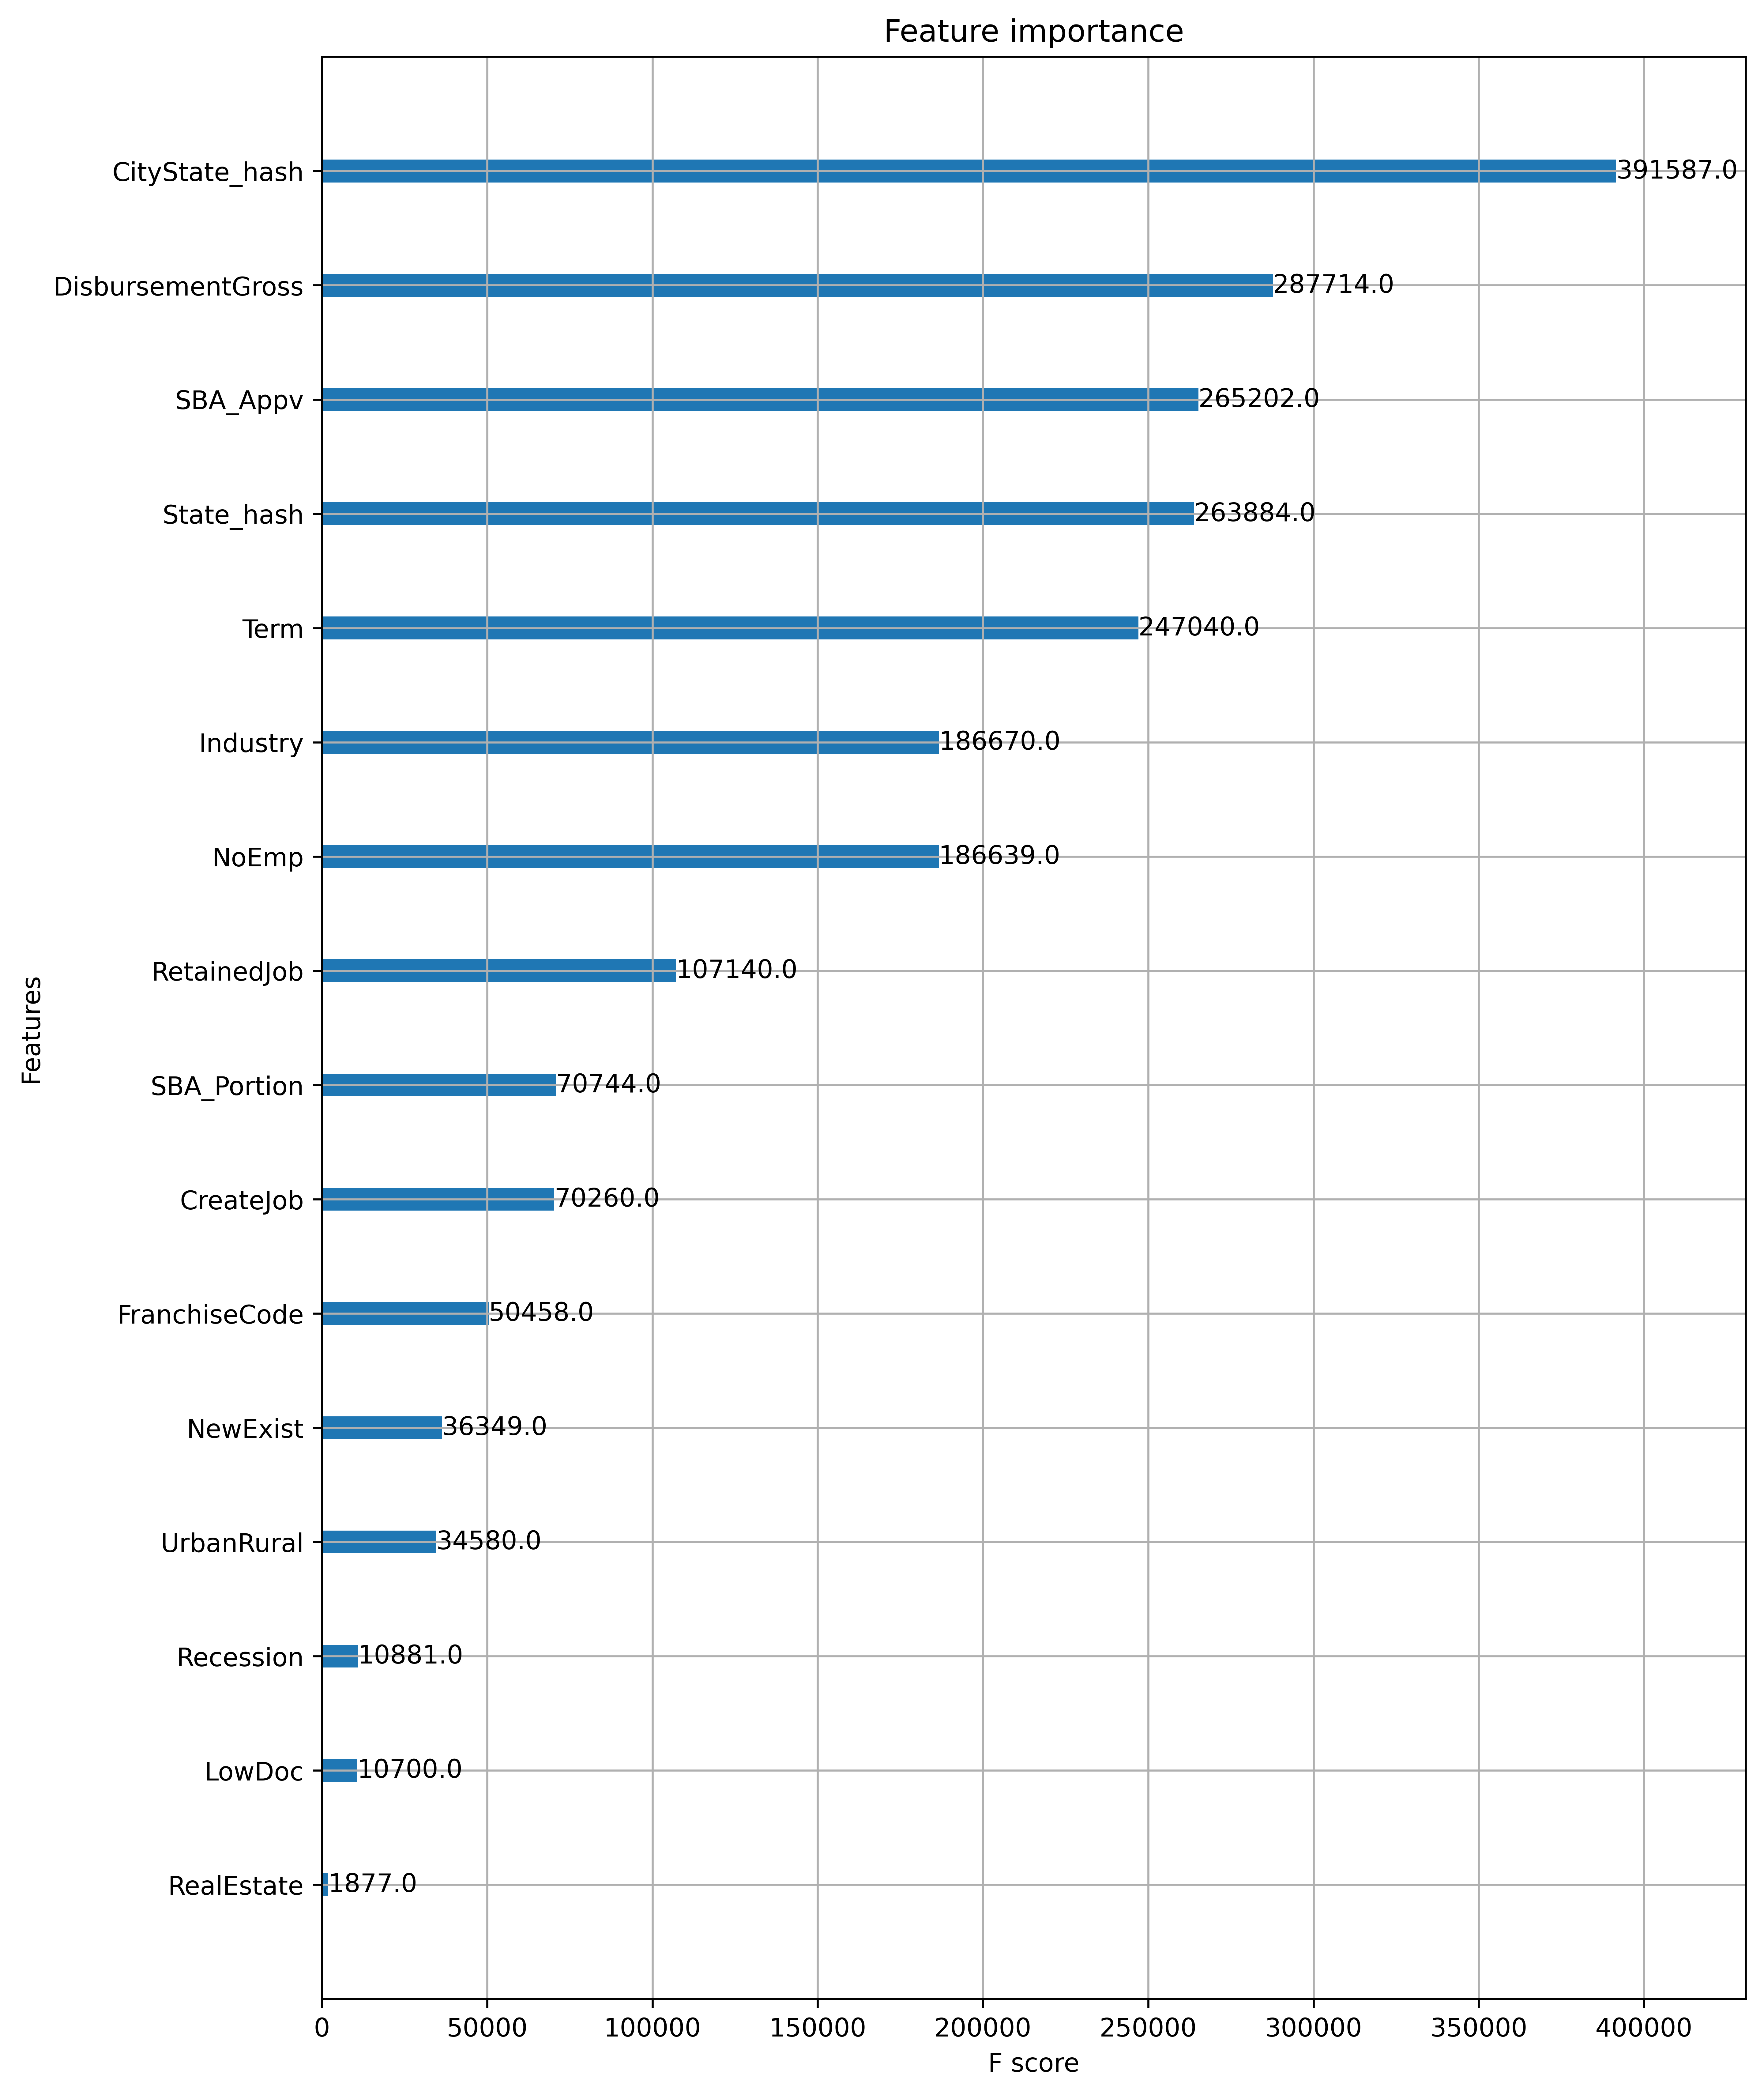

In [26]:
def obj_sample_usage():
    print(MyObject.keys())
    pl_model = MyObject['xg_model']
    x=plot_features(pl_model, (10,14))
    print()
    MyObject['X_train'].info()
    
obj_sample_usage()

In [27]:
# clear some variables from memory
del X, y, MyObject
gc.collect()

8071

In [28]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("SBA Machine Learning PipeLine completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<a id="part2"></a>
<div style="font-family: Trebuchet MS;background-color:DarkRed;color:AliceBlue;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
<h1 style='color:GhostWhite;'>Part 2 : Data Exploration and Preparation, Modeling, Metrics</h1></div>

<a id="de_load_df"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
<h3 style='color:GhostWhite;'>1. Load Dataset</h3></div>

In [160]:
sba = pd.read_csv(f'{filepath}SBAnational.csv',low_memory=False)
sba.head(2)

LoanNr_ChkDgt                         Name        City State    Zip  \
0     1000014003               ABC HOBBYCRAFT  EVANSVILLE    IN  47711   
1     1000024006  LANDMARK BAR & GRILLE (THE)   NEW PARIS    IN  46526   

               Bank BankState   NAICS ApprovalDate ApprovalFY  ...  RevLineCr  \
0  FIFTH THIRD BANK        OH  451120    28-Feb-97       1997  ...          N   
1   1ST SOURCE BANK        IN  722410    28-Feb-97       1997  ...          N   

   LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  BalanceGross  \
0       Y         NaN         28-Feb-99        $60,000.00         $0.00    
1       Y         NaN         31-May-97        $40,000.00         $0.00    

   MIS_Status ChgOffPrinGr       GrAppv     SBA_Appv  
0       P I F       $0.00   $60,000.00   $48,000.00   
1       P I F       $0.00   $40,000.00   $32,000.00   

[2 rows x 27 columns]

<a id="dep"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2. Data Exploration / Preparation</h2><br>
    </div>

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Reload dataset with some conversion</b><br>
    After review, decided to reload dataset with conversion of some features that may be needed for calculation.  It could be done after loading, but this is for instructive purposes on how it's done.
    </div>

In [232]:
conv_dict = {'DisbursementGross':fixvals,'SBA_Appv':fixvals,
                              'GrAppv':fixvals, 'ChgOffPrinGr':fixvals}
sba = pd.read_csv(f'{filepath}SBAnational.csv',
                            converters = conv_dict, 
                            # dtype = dtype_dict,
                            parse_dates=['DisbursementDate'],
                            low_memory=False)
print("Shape of SBA : ", sba.shape)
print(sba.info(memory_usage = 'deep'))
sba[['DisbursementGross','SBA_Appv','GrAppv','ChgOffPrinGr','DisbursementDate']].head(2)

Shape of SBA :  (899164, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  int64         
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  int64         
 8   ApprovalDate       899164 non-null  object        
 9   ApprovalFY         899164 non-null  object        
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  float64       
 13  CreateJob      

DisbursementGross   SBA_Appv     GrAppv ChgOffPrinGr DisbursementDate
0         60000.00   48000.00   60000.00         0.00        1999-02-28
1         40000.00   32000.00   40000.00         0.00        1997-05-31

<a id="conv_dtype"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.1 Convert dtype</h2>
    </div>

In [233]:
# Convert dtype of some columns that will be used in calculation or string extraction
sba = sba.astype({'DisbursementGross':np.float64,'SBA_Appv':np.float64,\
                              'GrAppv':np.float64, 'ChgOffPrinGr':np.float64, 'NAICS':np.str_})

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Prepare Pandas Profiler Report for a more detailed exploration</b><br>
    </div>

In [234]:
'''
For a better experience, the report is created as an html file that can be opened in a browser,
and downloaded from there  (Save As ..., html)
'''

def GetPandasProfiling():
    try:
        print(f'{color.bdblue}Please wait ... Profiling Report may take some time.{color.end}')

        # uncomment if one wants to see the report in a cell below
        #df.profile_report(title='SBA Pandas Profiling Report')

        profile = sba.profile_report(title='SBA Pandas Profiling Report', progress_bar=False,\
                                    correlations={
                                            "pearson": {"calculate": True},
                                            "spearman": {"calculate": True},
                                            "kendall": {"calculate": False},
                                            "phi_k": {"calculate": True}
                                            })
        profile.to_file(output_file = f'{savepath}SBA_Profiling_Report.html')
        print(f'{color.bdblue}Profiling Report completed.{color.end}')
    
        print()
        (kaggle_flag == 0) and print(f'SBA Profiling Report has been downloaded to path {savepath}')
        gc.collect()
        
    except Exception as e:
        print(f'Error: {e}')
        
GetPandasProfiling()

print()
(kaggle_flag == 1) and create_download_link('Open SBA Profiling Report in browser ---> ', \
                         f'{savepath}SBA_Profiling_Report.html')


Please wait ... Profiling Report may take some time.


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

Profiling Report completed.

SBA Profiling Report has been downloaded to path C:\Python\Python_Data_Science_Exercises\datasets\



False

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Prepare DataPrep Report for more EDA</b><br>
    </div>

In [235]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report

def GetDataPrepReport():
    try:
        print('Please wait, generating DataPrep report')
        report = create_report(sba, title='SBA DataPrep Report', progress = False);
        report.save(f'{savepath}sba_dataprep_report')
    
        (kaggle_flag == 0) and report.show_browser()
        
    except Exception as e:
        print(f'Error: {e}')
        
GetDataPrepReport()

# open html in browser, and from there, one can download using Save As, html   
(kaggle_flag == 1) and create_download_link('SBA DataPrep Report in browser ---> ',\
                                             f'{savepath}sba_dataprep_report.html')

Please wait, generating DataPrep report
Report has been saved to C:\Python\Python_Data_Science_Exercises\datasets\sba_dataprep_report.html!


False

<a id="drop_rows_cols"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.2 Drop rows or columns if needed</h2>
    </div>

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Check for na's in all columns, as well as invalid categories</b></div>

['Name', 'City', 'State', 'Bank', 'BankState', 'NewExist', 'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate', 'MIS_Status']


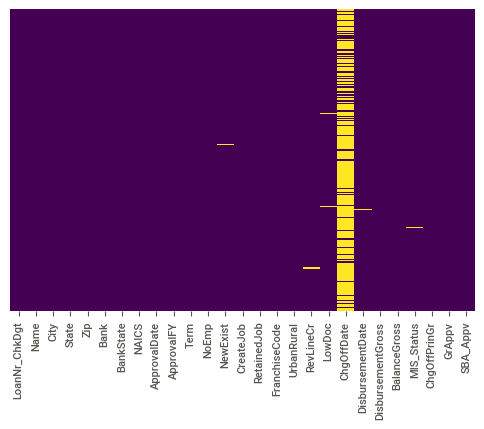

In [123]:
check_cols_with_nulls(sba)

In [124]:
print(f'{color.bdunl}Features with NA values{color.end}')
sba.isna().sum()

Features with NA values


LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

**The number of Na's in rows for the following features, with respect to the size of the database, are not many and can be dropped.**

In [125]:
sba.dropna(subset=['DisbursementDate', 'NewExist', 'City', 'State',\
                        'LowDoc', 'Name', 'NAICS', 'CreateJob', 'RetainedJob', 'FranchiseCode',\
                        'UrbanRural', 'NoEmp', 'Term', 'MIS_Status'], how='any', inplace=True)      

In [126]:
sba.isna().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                   1502
BankState              1509
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4518
LowDoc                    0
ChgOffDate           731189
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>RevLineCr</b></div>

In [127]:
len(sba[(sba['RevLineCr'] != 'Y') & (sba['RevLineCr'] != 'N')])
# too many unknowns, we will drop 'RevlineCr' later

277071

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>LowDoc</b></div>

In [128]:
len(sba[(sba['LowDoc'] != 'Y') & (sba['LowDoc'] != 'N')])

3411

<AxesSubplot:xlabel='LowDoc', ylabel='count'>

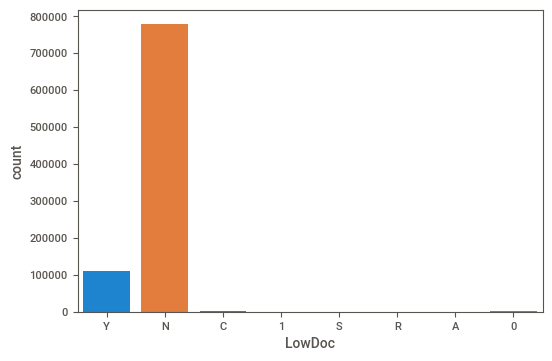

In [129]:
sns.countplot(x='LowDoc',data=sba)

* **LowDoc seems to have a bearing**

In [130]:
# we can drop rows that are not 'Y' or 'N'
sba = sba[(sba['LowDoc'] == 'Y') | (sba['LowDoc'] == 'N')]
len(sba[(sba['LowDoc'] != 'Y') & (sba['LowDoc'] != 'N')])

0

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>NewExist</b>

In [131]:
len(sba[(sba['NewExist'] != 1) & (sba['NewExist'] != 2)])

1021

<AxesSubplot:xlabel='NewExist', ylabel='count'>

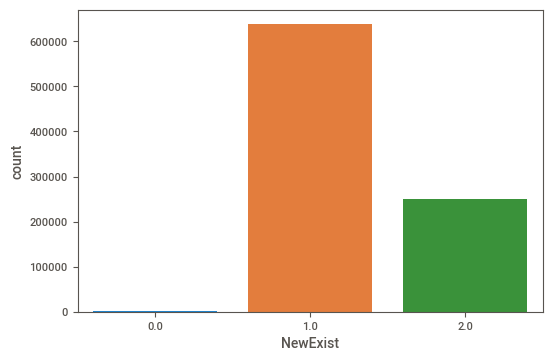

In [132]:
sns.countplot(x='NewExist',data=sba)

In [133]:
# records that are not 1 or 2, we can drop these rows as NewExist seems to have a bearing
sba = sba[(sba['NewExist'] == 1) | (sba['NewExist'] == 2)]
len(sba[(sba['NewExist'] != 1) & (sba['NewExist'] != 2)])

0

In [134]:
sba = sba.astype({'NewExist':np.int8})

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>FranchiseCode</b></div>

In [135]:
sba['FranchiseCode'].unique()

array([    1,     0, 15100, ...,  2899, 18701, 15930], dtype=int64)

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>UrbanRural</b></div>

In [136]:
sba['UrbanRural'].unique()

array([0, 1, 2], dtype=int64)

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Term</b></div>

In [137]:
print(len(sba[sba['Term'].isna()]))
print(len(sba[sba['Term']==0]))
print(len(sba[sba['Term']<0]))

0
801
0


In [138]:
sba.head(2)

LoanNr_ChkDgt                         Name        City State    Zip  \
0     1000014003               ABC HOBBYCRAFT  EVANSVILLE    IN  47711   
1     1000024006  LANDMARK BAR & GRILLE (THE)   NEW PARIS    IN  46526   

               Bank BankState   NAICS ApprovalDate ApprovalFY  ...  RevLineCr  \
0  FIFTH THIRD BANK        OH  451120    28-Feb-97       1997  ...          N   
1   1ST SOURCE BANK        IN  722410    28-Feb-97       1997  ...          N   

   LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  BalanceGross  \
0       Y         NaN        1999-02-28            60000.0        $0.00    
1       Y         NaN        1997-05-31            40000.0        $0.00    

   MIS_Status ChgOffPrinGr   GrAppv SBA_Appv  
0       P I F          0.0  60000.0  48000.0  
1       P I F          0.0  40000.0  32000.0  

[2 rows x 27 columns]

In [139]:
# Trim leading and trailing spaces
sba['City'] = sba['City'].str.strip()

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Check for na's in all columns</b></div>

['Bank', 'BankState', 'RevLineCr', 'ChgOffDate']


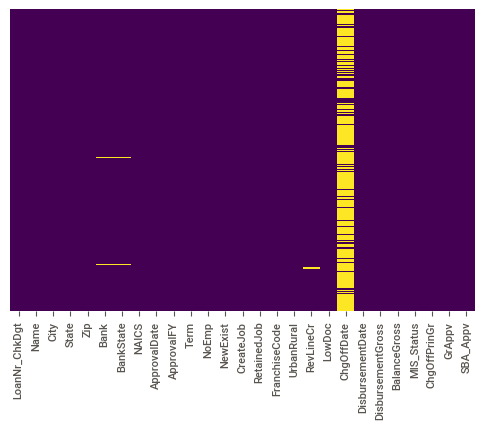

In [140]:
check_cols_with_nulls(sba)

# We can ignore these, features to be dropped later

In [141]:
len(sba)

887826

In [142]:
# Save 2
def Save2():
    # for feather format, reset_index(drop=True) to prevent "Unnamed column" being created
    sdf = sba.copy().reset_index(drop=True)
    sdf.to_feather(f'{savepath}sba_save2.csv.feather')

    # index=False to prevent "Unnamed Column" being created
    #sba.to_csv(f'{savepath}sba_save2.csv', index=False)
    
    print('Saved to sba_save2.csv.feather')

Save2()

# Short circuiting
(kaggle_flag == 1) and FileLink(r'sba_save2.csv.feather')  # Kaggle only

Saved to sba_save2.csv.feather


False

<a id="drop_duplicates"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.3 Drop Duplicate Rows</h2>
    </div>

In [54]:
def DropDuplicates():
    dupl_series = sba.duplicated()
    num_of_dupl = len(sba[dupl_series == True])
    if num_of_dupl > 0:
        print(f'Number of Duplicates : {color.bold}{num_of_dupl}{color.end}')
        print()
        print(sba[dupl_series].head(5))
        sba.drop_duplicates(inplace=True)
        print()
        print(f'{color.bold}{num_of_dupl}{color.end} duplicate rows were dropped.')
    else:
        print(f'Duplicate rows found: {color.bold}None{color.end}')

#DropDuplicates()

Duplicate rows found: None


<a id="create_new_features"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.4 Create New Features</h2>
    </div>

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Industry</b> - The industry sector is the 1st 2 digits of NAICS
    </div>

In [143]:
sba['Industry'] = sba['NAICS'].str[0:2]
sba = sba.astype({'Industry':np.int32})

In [144]:
sba['Industry'].head(2)

0    45
1    72
Name: Industry, dtype: int32

In [145]:
sba['Industry'].unique()
# There is an invalid industry shown which is '0', caused by blank NAICS

array([45, 72, 62,  0, 33, 81, 23, 44, 42, 61, 53, 54, 31, 51, 71, 52, 21,
       32, 56, 48, 11, 92, 22, 49, 55])

In [146]:
len(sba[sba['Industry'] == 0])
# This is a bummer, as industry sector has a big effect on a business, speaking as a business 
# domain expert.  Do we drop those with NAICS = 0 ?

200089

In [147]:
# At this stage, we leave it as is and treat it as unknown industry
sba.head(2)

LoanNr_ChkDgt                         Name        City State    Zip  \
0     1000014003               ABC HOBBYCRAFT  EVANSVILLE    IN  47711   
1     1000024006  LANDMARK BAR & GRILLE (THE)   NEW PARIS    IN  46526   

               Bank BankState   NAICS ApprovalDate ApprovalFY  ...  LowDoc  \
0  FIFTH THIRD BANK        OH  451120    28-Feb-97       1997  ...       Y   
1   1ST SOURCE BANK        IN  722410    28-Feb-97       1997  ...       Y   

   ChgOffDate  DisbursementDate  DisbursementGross  BalanceGross  MIS_Status  \
0         NaN        1999-02-28            60000.0        $0.00        P I F   
1         NaN        1997-05-31            40000.0        $0.00        P I F   

   ChgOffPrinGr   GrAppv SBA_Appv Industry  
0           0.0  60000.0  48000.0       45  
1           0.0  40000.0  32000.0       72  

[2 rows x 28 columns]

In [148]:
# Check if we can impute from the name.  For example, a bar (or similar) business
sba[(sba['Name'].str.contains('bar',case=False)) & (sba['Industry'] == 0)]\
    [['Name','Industry']].head(10)

Name  Industry
692            DICKEY'S BARBECUE PIT         0
892      MID-STATE REBAR FABRICATORS         0
2763      MCDUFFY'S SPORTS BAR, INC.         0
3488  PETRUCCI'S DAIRY BARN OF MARLT         0
3941       SEOUL BARBECUE RESTAURANT         0
4022   STEAMERS RAW BAR & SEA GRILLE         0
4748             QUALITY INN BARSTOW         0
7856     THE ISLANDS RAW BAR & GRILL         0
7895  SANTA BARBARA PERIPHERALS INC.         0
8047   M'S PLACE SMOKEHOUSE BARBEQUE         0

**It's not feasible to impute missing Industry codes efficiently, so we abandon the idea.**

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Recession</b><br>
We want to account for variation due to the Great Recession (December 2007 to June 2009). Should we separate the datasets into different time periods ? Before, During, and After ?  Let's check how large the sets are later.  In the meantime, we create a new feature, Recession, with 1 for 'Y' and 0 for 'N' depending on the DisbursementDate. 
<br><br>
</div>

In [149]:
# Convert "DisbursementDate" to datetime

# sba['DisbursementDate'] = pd.to_datetime(sba['DisbursementDate'], format='%d-%b-%y')

# sba.head(2)

In [150]:
# Create new column based on condition
sba['Recession'] = np.where((sba['DisbursementDate'] >= '2007-09-01')\
                     & (sba['DisbursementDate'] <= '2009-06-30'), 1, 0)

In [151]:
print(f'Total - {len(sba)}')
y = len(sba[sba['Recession'] == 1])
n = len(sba[sba['Recession'] == 0])
print(f'Recession - {y}')
print(f'Not Recession - {n}')

Total - 887826
Recession - 65647
Not Recession - 822179


<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Real Estate</b><br>
Loans backed by real estate will have terms 20 years or greater (≥240 months) and are the only loans granted for such a long term, whereas loans not backed by real estate will have terms less than 20 years ( < 240 months).<br><br>
1 - Backed By Real Estate<br>
0 - Not Backed By Real Estate<br><br>

In [152]:
# Create new column based on condition
sba['RealEstate'] = np.where(sba['Term'] >= 240, 1, 0)

In [153]:
print(f'Total - {len(sba)}')
y = len(sba[sba['RealEstate'] == 1])
n = len(sba[sba['RealEstate'] == 0])
print(f'Yes - {y}')
print(f'No - {n}')
print(f'Yes and No - {y+n}')

Total - 887826
Yes - 150700
No - 737126
Yes and No - 887826


<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>SBA_Portion</b><br>
The portion which is the percentage of the loan that is guaranteed by SBA. This is derived by calculating the ratio of the amount of the loan SBA guarantees and the gross amount approved by the bank (SBA_Appv/GrAppv) * 100.<br><br></div>

In [154]:
sba['SBA_Portion']=(sba['SBA_Appv']/sba['GrAppv']) * 100
sba.head(2)

LoanNr_ChkDgt                         Name        City State    Zip  \
0     1000014003               ABC HOBBYCRAFT  EVANSVILLE    IN  47711   
1     1000024006  LANDMARK BAR & GRILLE (THE)   NEW PARIS    IN  46526   

               Bank BankState   NAICS ApprovalDate ApprovalFY  ...  \
0  FIFTH THIRD BANK        OH  451120    28-Feb-97       1997  ...   
1   1ST SOURCE BANK        IN  722410    28-Feb-97       1997  ...   

   DisbursementGross  BalanceGross  MIS_Status  ChgOffPrinGr   GrAppv  \
0            60000.0        $0.00        P I F           0.0  60000.0   
1            40000.0        $0.00        P I F           0.0  40000.0   

   SBA_Appv  Industry Recession RealEstate SBA_Portion  
0   48000.0        45         0          0        80.0  
1   32000.0        72         0          0        80.0  

[2 rows x 31 columns]

**CityState**

In [155]:
sba["CityState"] = sba["City"] + "_" + sba["State"]
sba[["CityState", "City", "State"]].head()

CityState          City State
0    EVANSVILLE_IN    EVANSVILLE    IN
1     NEW PARIS_IN     NEW PARIS    IN
2   BLOOMINGTON_IN   BLOOMINGTON    IN
3  BROKEN ARROW_OK  BROKEN ARROW    OK
4       ORLANDO_FL       ORLANDO    FL

In [156]:
sba.head(2)

LoanNr_ChkDgt                         Name        City State    Zip  \
0     1000014003               ABC HOBBYCRAFT  EVANSVILLE    IN  47711   
1     1000024006  LANDMARK BAR & GRILLE (THE)   NEW PARIS    IN  46526   

               Bank BankState   NAICS ApprovalDate ApprovalFY  ...  \
0  FIFTH THIRD BANK        OH  451120    28-Feb-97       1997  ...   
1   1ST SOURCE BANK        IN  722410    28-Feb-97       1997  ...   

   BalanceGross  MIS_Status  ChgOffPrinGr   GrAppv  SBA_Appv  Industry  \
0        $0.00        P I F           0.0  60000.0   48000.0        45   
1        $0.00        P I F           0.0  40000.0   32000.0        72   

   Recession RealEstate SBA_Portion      CityState  
0          0          0        80.0  EVANSVILLE_IN  
1          0          0        80.0   NEW PARIS_IN  

[2 rows x 32 columns]

In [157]:
# Save 3
def Save3():
    sdf = sba.copy().reset_index(drop=True)
    sdf.to_feather(f'{savepath}sba_save3.csv.feather')

    print('Saved to sba_save3.csv.feather')
    
Save3()

(kaggle_flag == 1) and FileLink(r'sba_save3.csv.feather')  # Kaggle only

Saved to sba_save3.csv.feather


False

<a id="encode_cat"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.5 Encode Categorical Features</h2>
    </div>

In [158]:
sba.select_dtypes(["object"]).nunique()

Name            771232
City             32346
State               51
Bank              5791
BankState           56
NAICS             1311
ApprovalDate      9815
ApprovalFY          47
RevLineCr           18
LowDoc               2
ChgOffDate        6429
BalanceGross        15
MIS_Status           2
CityState        44196
dtype: int64

<div style="font-family: Trebuchet MS;background-color:Chocolate;color:AliceBlue;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>MIS_Status</b><br>
    This will be the <b>target</b> variable</div>

P I F     732244
CHGOFF    155582
Name: MIS_Status, dtype: int64


<AxesSubplot:xlabel='MIS_Status', ylabel='count'>

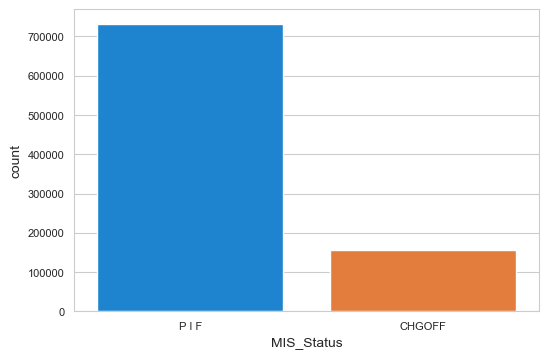

In [159]:
sns.set_style('whitegrid')
# Target variable is MIS Status, a categorical variable

print(sba['MIS_Status'].value_counts())
sns.countplot(x='MIS_Status',data=sba)

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    This shows a skewed distribution, where this bias in the target can influence many machine learning algorithms, leading some to ignore the minority class entirely, in this case, CHGOFF.  Before oversampling the data, will try as is.<br><br></div>

In [160]:
# Update column based on condition
sba['MIS_Status'] = np.where((sba['MIS_Status'] == 'P I F'), 1, 0)

In [161]:
print(sba['MIS_Status'].dtype)
sba.head(2)[['City','MIS_Status']]

int32


City  MIS_Status
0  EVANSVILLE           1
1   NEW PARIS           1

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>LowDoc</b><br>
'Y' = 1<br>
'N' = 0

In [162]:
# Update column based on condition
sba['LowDoc'] = np.where((sba['LowDoc'] == 'Y'), 1, 0)

sba.head(2)

LoanNr_ChkDgt                         Name        City State    Zip  \
0     1000014003               ABC HOBBYCRAFT  EVANSVILLE    IN  47711   
1     1000024006  LANDMARK BAR & GRILLE (THE)   NEW PARIS    IN  46526   

               Bank BankState   NAICS ApprovalDate ApprovalFY  ...  \
0  FIFTH THIRD BANK        OH  451120    28-Feb-97       1997  ...   
1   1ST SOURCE BANK        IN  722410    28-Feb-97       1997  ...   

   BalanceGross  MIS_Status  ChgOffPrinGr   GrAppv  SBA_Appv  Industry  \
0        $0.00            1           0.0  60000.0   48000.0        45   
1        $0.00            1           0.0  40000.0   32000.0        72   

   Recession RealEstate  SBA_Portion      CityState  
0          0          0         80.0  EVANSVILLE_IN  
1          0          0         80.0   NEW PARIS_IN  

[2 rows x 32 columns]

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Others</b></div>

In [163]:
# will not hash 'City' as it is already covered by 'CityState'

def HashCol():
    cols_to_drop = []
    hash_constant = 900000   # fixed value so we can programmatically reproduce the hash when needed
    len_data=len(sba)
    for col in sba[['State','CityState']]:
        if sba[col].dtype == 'object':
            print(f'Column {col} has {sba[col].nunique()} values among {len_data}')

        if sba[col].nunique() < 25:
            print(f'One-hot encoding of {col}')
            one_hot_cols = pd.get_dummies(sba[col])
            for ohc in one_hot_cols.columns:
                sba[col + '_' + ohc] = one_hot_cols[ohc]
        else:
            print(f'Hashing of {col}')
            sba[col + '_hash'] = sba[col].apply(lambda row: int(hashlib.sha1((col + "_" + \
                                    str(row)).encode('utf-8')).hexdigest(), 16) % hash_constant)

        cols_to_drop.append(col)
    print(cols_to_drop)

HashCol()

Column State has 51 values among 887826
Hashing of State
Column CityState has 44196 values among 887826
Hashing of CityState
['State', 'CityState']


In [164]:
sba.head(2)[['State','CityState','State_hash','CityState_hash']]

State      CityState  State_hash  CityState_hash
0    IN  EVANSVILLE_IN      705173          717067
1    IN   NEW PARIS_IN      705173          639604

In [165]:
sba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887826 entries, 0 to 899163
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      887826 non-null  int64         
 1   Name               887826 non-null  object        
 2   City               887826 non-null  object        
 3   State              887826 non-null  object        
 4   Zip                887826 non-null  int64         
 5   Bank               886328 non-null  object        
 6   BankState          886321 non-null  object        
 7   NAICS              887826 non-null  object        
 8   ApprovalDate       887826 non-null  object        
 9   ApprovalFY         887826 non-null  object        
 10  Term               887826 non-null  int64         
 11  NoEmp              887826 non-null  int64         
 12  NewExist           887826 non-null  int8          
 13  CreateJob          887826 non-null  int64   

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>TimeFrame</b><br>
Create a dataset for later use where we restrict the time frame to loans by excluding those disbursed after 2010 due to the fact the term of a loan is frequently 5 or more years.
    <br><br>

In [166]:
sba_bef_2011 = sba[sba['DisbursementDate'] <= '2010-12-31'].copy()
len(sba_bef_2011[sba_bef_2011['DisbursementDate'] > '2010-12-31'])
len(sba_bef_2011[sba_bef_2011['DisbursementDate'] <= '2011-01-01'])

868663

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Drop columns that are no longer needed<b></div>

In [167]:
# Save 4
def Save4():
    sdf = sba.copy().reset_index(drop=True)
    sdf.to_feather(f'{savepath}sba_save4.csv.feather')

    print('saved to sba_save4.csv.feather')

Save4()

(kaggle_flag == 1) and FileLink(r'sba_save4.csv.feather')  # Kaggle only

saved to sba_save4.csv.feather


False

In [168]:
cols_to_drop = ['LoanNr_ChkDgt', 'Bank', 'BankState', 'ApprovalDate', \
                        'ApprovalFY', 'ChgOffDate', 'BalanceGross', 'NAICS', 'ChgOffPrinGr', \
                        'Name', 'RevLineCr', 'DisbursementDate', 'City', 'State', 'CityState',\
                         'GrAppv','Zip']

sba_bef_2011.drop(columns=cols_to_drop, inplace=True)

sba.drop(columns=cols_to_drop, inplace=True)

sba_bef_2011 = reduce_mem_usage(sba_bef_2011)

print()
sba = reduce_mem_usage(sba)

print()
print('Unneeded Columns Dropped')
print(sba.info())

Memory usage of dataframe is 96.93 MB

Memory usage after optimization is: 38.94 MB
Decreased by 59.8%

Memory usage of dataframe is 131.31 MB

Memory usage after optimization is: 72.04 MB
Decreased by 45.1%

Unneeded Columns Dropped
<class 'pandas.core.frame.DataFrame'>
Int64Index: 887826 entries, 0 to 899163
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               887826 non-null  int16  
 1   NoEmp              887826 non-null  int16  
 2   NewExist           887826 non-null  int8   
 3   CreateJob          887826 non-null  int16  
 4   RetainedJob        887826 non-null  int16  
 5   FranchiseCode      887826 non-null  int32  
 6   UrbanRural         887826 non-null  int8   
 7   LowDoc             887826 non-null  int8   
 8   DisbursementGross  887826 non-null  float32
 9   MIS_Status         887826 non-null  int8   
 10  SBA_Appv           887826 non-null  float32
 11  Industry     

In [169]:
def SaveBef2011():
    # Save sba_bef_2011
    ## save this dataset to working dir
    sdf = sba_bef_2011.copy().reset_index(drop=True)
    sdf.to_feather(f'{savepath}sba_bef_2011.csv.feather')

    print("saved to sba_bef_2011.csv.feather")
    
SaveBef2011()

(kaggle_flag == 1) and FileLink(r'sba_bef_2011.csv.feather')  # Kaggle only

saved to sba_bef_2011.csv.feather


False

In [170]:
del sba_bef_2011
gc.collect()

7978

In [171]:
# Save 5
def Save5():
    sdf = sba.copy().reset_index(drop=True)
    sdf.to_feather(f'{savepath}sba_save5.csv.feather')

    print('saved to sba_save5.csv.feather')

Save5()

(kaggle_flag == 1) and FileLink(r'sba_save5.csv.feather')  # Kaggle only

saved to sba_save5.csv.feather


False

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Check for Infinite Values<b></div>

In [172]:
check_infinity_nan(sba,'sba')

checking for infinity

printing the count of infinity values
sba contains 0 infinite values

Does sba have Nan or Null values ?  False


<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Check Correlations</b></div>

[Text(0, 0.5, 'Term'),
 Text(0, 1.5, 'NoEmp'),
 Text(0, 2.5, 'NewExist'),
 Text(0, 3.5, 'CreateJob'),
 Text(0, 4.5, 'RetainedJob'),
 Text(0, 5.5, 'FranchiseCode'),
 Text(0, 6.5, 'UrbanRural'),
 Text(0, 7.5, 'LowDoc'),
 Text(0, 8.5, 'DisbursementGross'),
 Text(0, 9.5, 'MIS_Status'),
 Text(0, 10.5, 'SBA_Appv'),
 Text(0, 11.5, 'Industry'),
 Text(0, 12.5, 'Recession'),
 Text(0, 13.5, 'RealEstate'),
 Text(0, 14.5, 'SBA_Portion'),
 Text(0, 15.5, 'State_hash'),
 Text(0, 16.5, 'CityState_hash')]

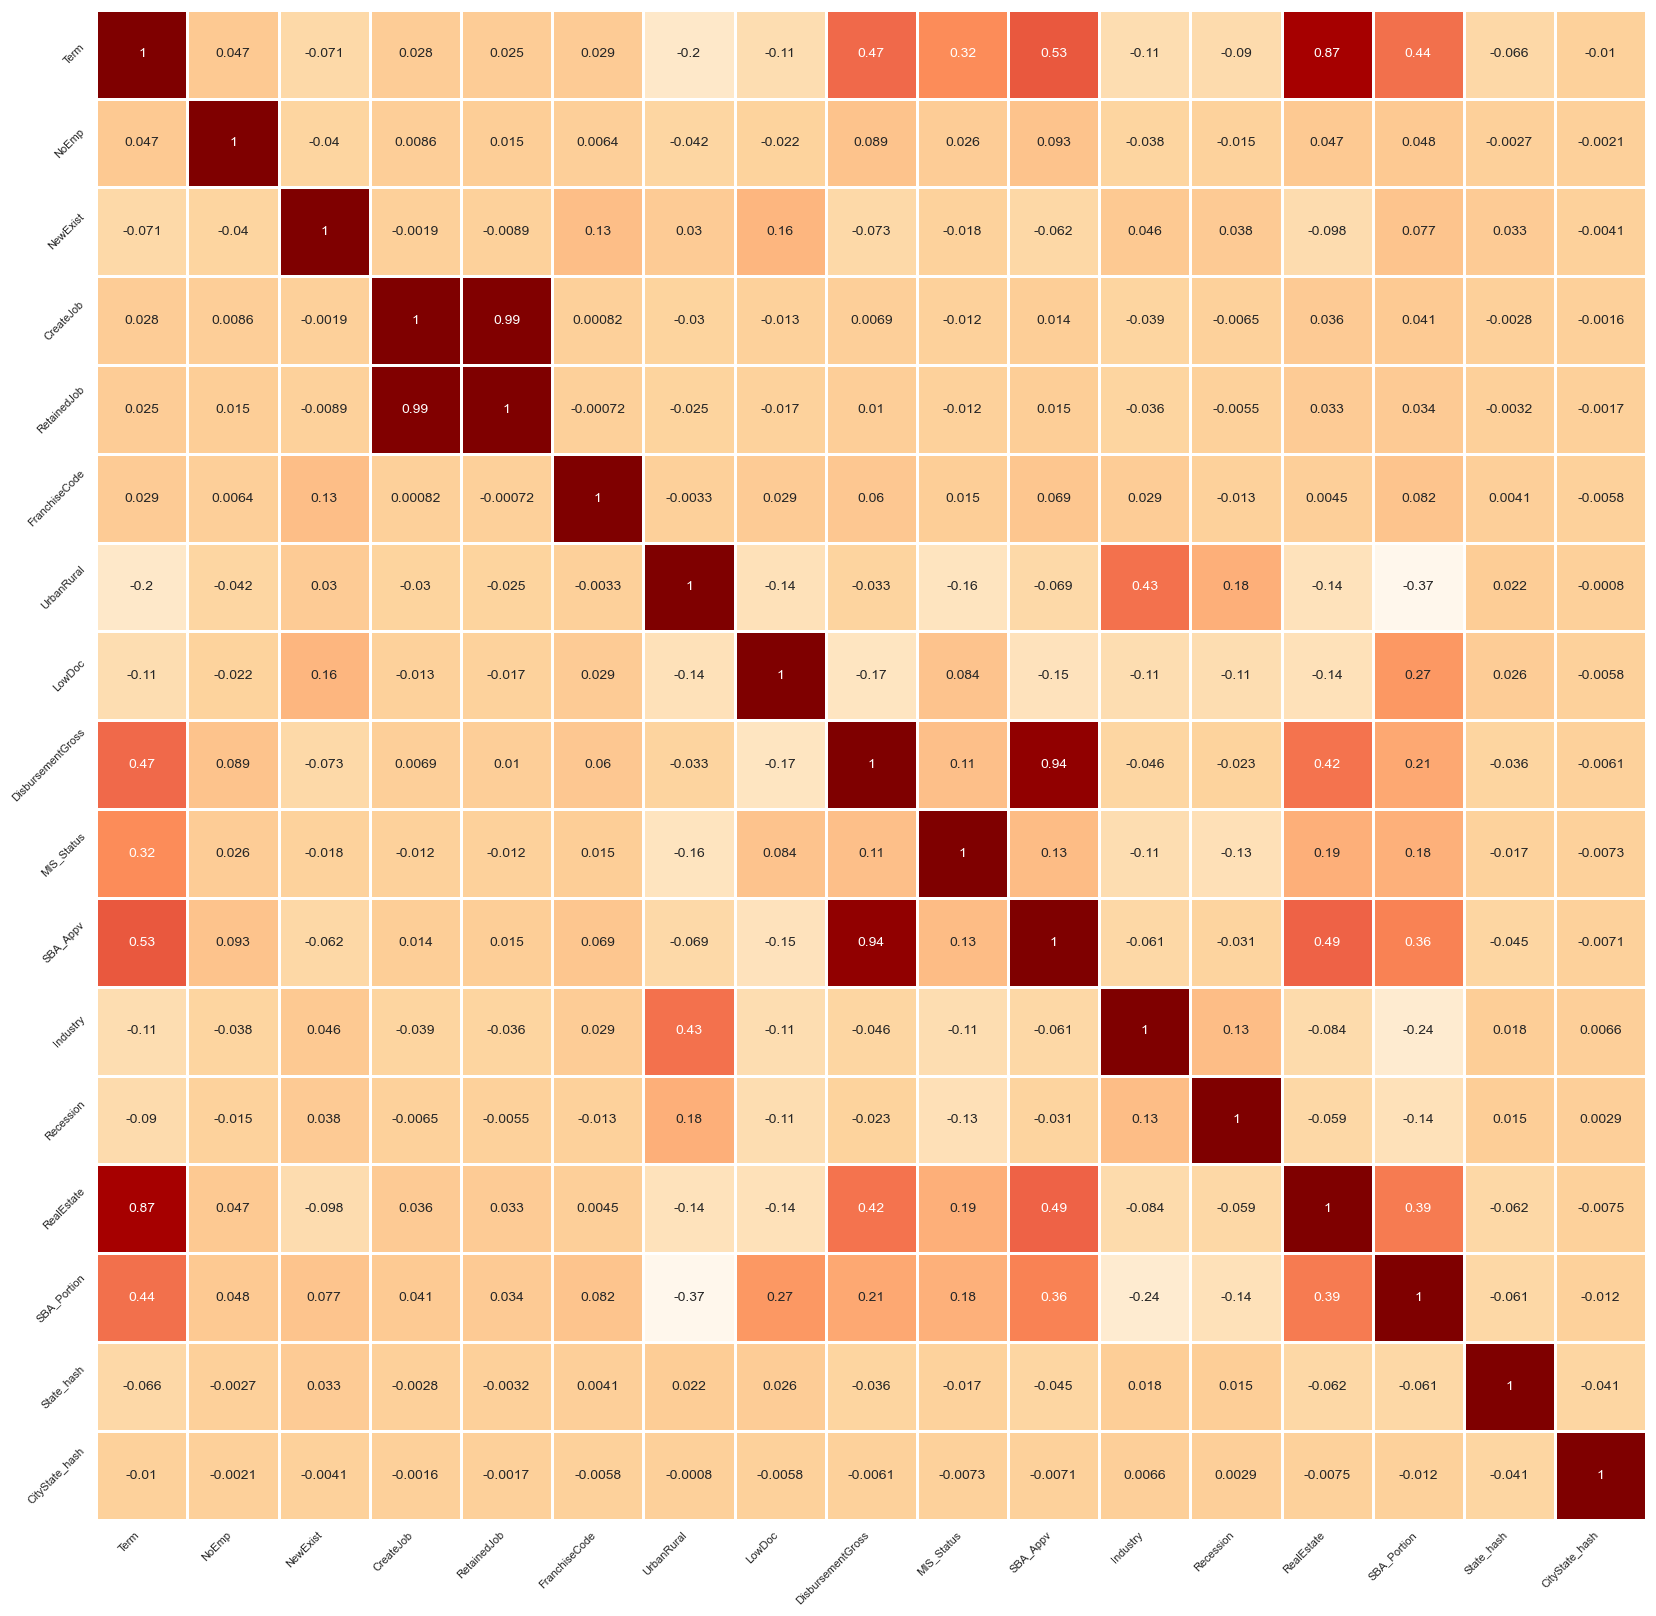

In [173]:
fig, ax = plt.subplots(figsize=(20,20))

g = sns.heatmap(
    sba.corr(),
    annot=True,
    ax=ax,
    cmap='OrRd',
    cbar=False,
    linewidth=1
)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')

<a id="eda_check"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.6 EDA Check</h2><br>
    Here we generate a SweetViz report for another EDA review
    </div>

In [86]:
def GetSweetVizReport():
    try:
        df = sba.copy()
        my_report = sv.analyze(df, target_feat = 'MIS_Status')
    
        my_report.show_html(filepath=f'{savepath}SBA_sweetviz_report.html', 
                open_browser=True, 
                layout='vertical', 
                scale=None)
        print()
        (kaggle_flag == 0) and print(f'SweetViz Report has been downloaded to path {savepath}')
        
    except Exception as e:
        print(f'Error: {e}')
        
GetSweetVizReport()

print()
(kaggle_flag == 1) and create_download_link('Open SweetViz Report in browser ---> ',\
                                            f'{savepath}SBA_sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report C:\Python\Python_Data_Science_Exercises\datasets\SBA_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.

SweetViz Report has been downloaded to path C:\Python\Python_Data_Science_Exercises\datasets\



False

In [174]:
del sba
gc.collect()

0

<a id="build_model"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3. Build Model Using XGBoost</h2>
    </div>

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Early Stopping Rounds<b></div>

"<b>Overfitting</b> is a problem with sophisticated non-linear learning algorithms like gradient boosting.  Early stopping is an approach to training complex machine learning models to avoid overfitting.
<br><br>
<b>XGBoost supports early stopping after a fixed number of iterations.</b>  In addition to specifying a metric and test dataset for evaluation in each epoch, one must specify a window of the number of epochs over which no improvement is observed. This is specified in the early_stopping_rounds parameter.
<br><br>
It is generally a good idea to select the early_stopping_rounds as a reasonable function of the total number of training epochs (10% in this case) or attempt to correspond to the period of inflection points as might be observed on plots of learning curves.
<br><br> - <a href = "https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/">Avoid Overfitting By Early Stopping With XGBoost In Python</a>
<br><br>
In the <a href="#xgboost_class">XGBoost class</a> created earlier, n_estimators = 4000.  400 is used as the value for early_stopping_rounds during fitting, 10% of 4000. 
<br><br>
We can also check by plotting, shown in the <a href = "#early_stopping_rounds">Early Stopping Rounds section</a> near the end of this notebook, for reference.

<a id="model1"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.1 Model v1</h2>
    </div>

In [88]:
%%time

def RunModelv1():
    # Select subset of predictors
    X = pd.read_feather(f'{savepath}sba_save5.csv.feather')

    y = X.pop('MIS_Status')

    model1 = process_model(X, y)
    model1.split_data(0.7)
    model1.prep_run_model( "Metrics : Full SBA Not Oversampled")
    print()
    
RunModelv1()

MIS_Status Count ->  1 : 732244, 0 : 155582

Shapes Before And After Splitting Dataset :
X (887826, 16)   y (887826,)
X_train (621478, 16)   y_train (621478,)
X_valid (133174, 16)   y_valid (133174,)
X_test (133174, 16)   y_test (133174,)

Please wait, Fitting model can take time ...
Fitting model completed.

Preparing PRedictions

Metrics : Full SBA Not Oversampled
MAE: 0.05820205145148452
RMSE: 0.24125101336882404

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83     23373
           1       0.96      0.97      0.96    109801

    accuracy                           0.94    133174
   macro avg       0.91      0.89      0.90    133174
weighted avg       0.94      0.94      0.94    133174


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 18737 times correctly   (85.75 %)
False Negative : CHGOFF (0) was predicted 3115 times incorrectly     (14.25 %)
True Positive : P I F (1) was predicted 106686 times co

<div class="alert alert-block alert-danger">  
<b>Accuracy for model is good; but ...</b> Precision, Recall, and f1-score of minority class 0 (CHGOFF) is <b>much lower</b> than that of 1 (P I F). This is because MIS_Status is heavily skewed towards 1 (P I F).</div>

<div class="alert alert-block alert-info">  
In such a scenario, <b>Accuracy is not a good metric</b>, as it favors the majority.  <b>The f1-score is the more ideal metric</b>, which correctly shows a poorer score by the minority class.<br><br>
    To solve this, we try <b>Oversampling the data</b>, in the next section.</div>

In [89]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("SBA Machine Learning Model 1 completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<a id="oversample"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;"><h2 style='color:GhostWhite;'>3.2 OverSample</h2>
    </div>

<a id="model2"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;"><h2 style='color:GhostWhite;'>3.2.1 Model v2</h2>
    </div>

In [90]:
%%time

def RunModelv2():
    # Select subset of predictors
    X = pd.read_feather(f'{savepath}sba_save5.csv.feather')

    # Select target
    y = X.pop('MIS_Status')

    model2 = process_model(X, y)
    model2.osample()             # oversampling method
    model2.split_data(0.7)
    model2_results = model2.prep_run_model("Metrics : Full SBA Oversampled")

    return model2_results['xg_model']

modelv2 = RunModelv2()

MIS_Status Count ->  1 : 732244, 0 : 155582
887826
887826
Before Oversampling -> 1 : 732244, 0 : 155582
After Oversampling  -> 1 : 732244, 0 : 732244

Shapes Before And After Splitting Dataset :
X (1464488, 16)   y (1464488,)
X_train (1025141, 16)   y_train (1025141,)
X_valid (219673, 16)   y_valid (219673,)
X_test (219674, 16)   y_test (219674,)

Please wait, Fitting model can take time ...
Fitting model completed.

Preparing PRedictions

Metrics : Full SBA Oversampled
MAE: 0.07204344639532397
RMSE: 0.2684091026685272

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93    109883
           1       0.93      0.92      0.93    109790

    accuracy                           0.93    219673
   macro avg       0.93      0.93      0.93    219673
weighted avg       0.93      0.93      0.93    219673


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 102608 times correctly   (92.31 %)
False Negative : CHGOFF (0) 

<div class="alert alert-block alert-info">
    After oversampling of the minority class, class 0 (CHGOFF) <b>now has a similar </b> precision, recall, and f1-score as class 1 (P I F).
<br><br>     
    The <b>accuracy score</b> is slightly lower than when not oversampled, but much better f-scores.  This should be a good metric now as the target classification is no longer imbalanced.  <b>The model is now more accurate in predicting the target as f-scores are better now.</b></div>

In [91]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("SBA Machine Learning Model 2 completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

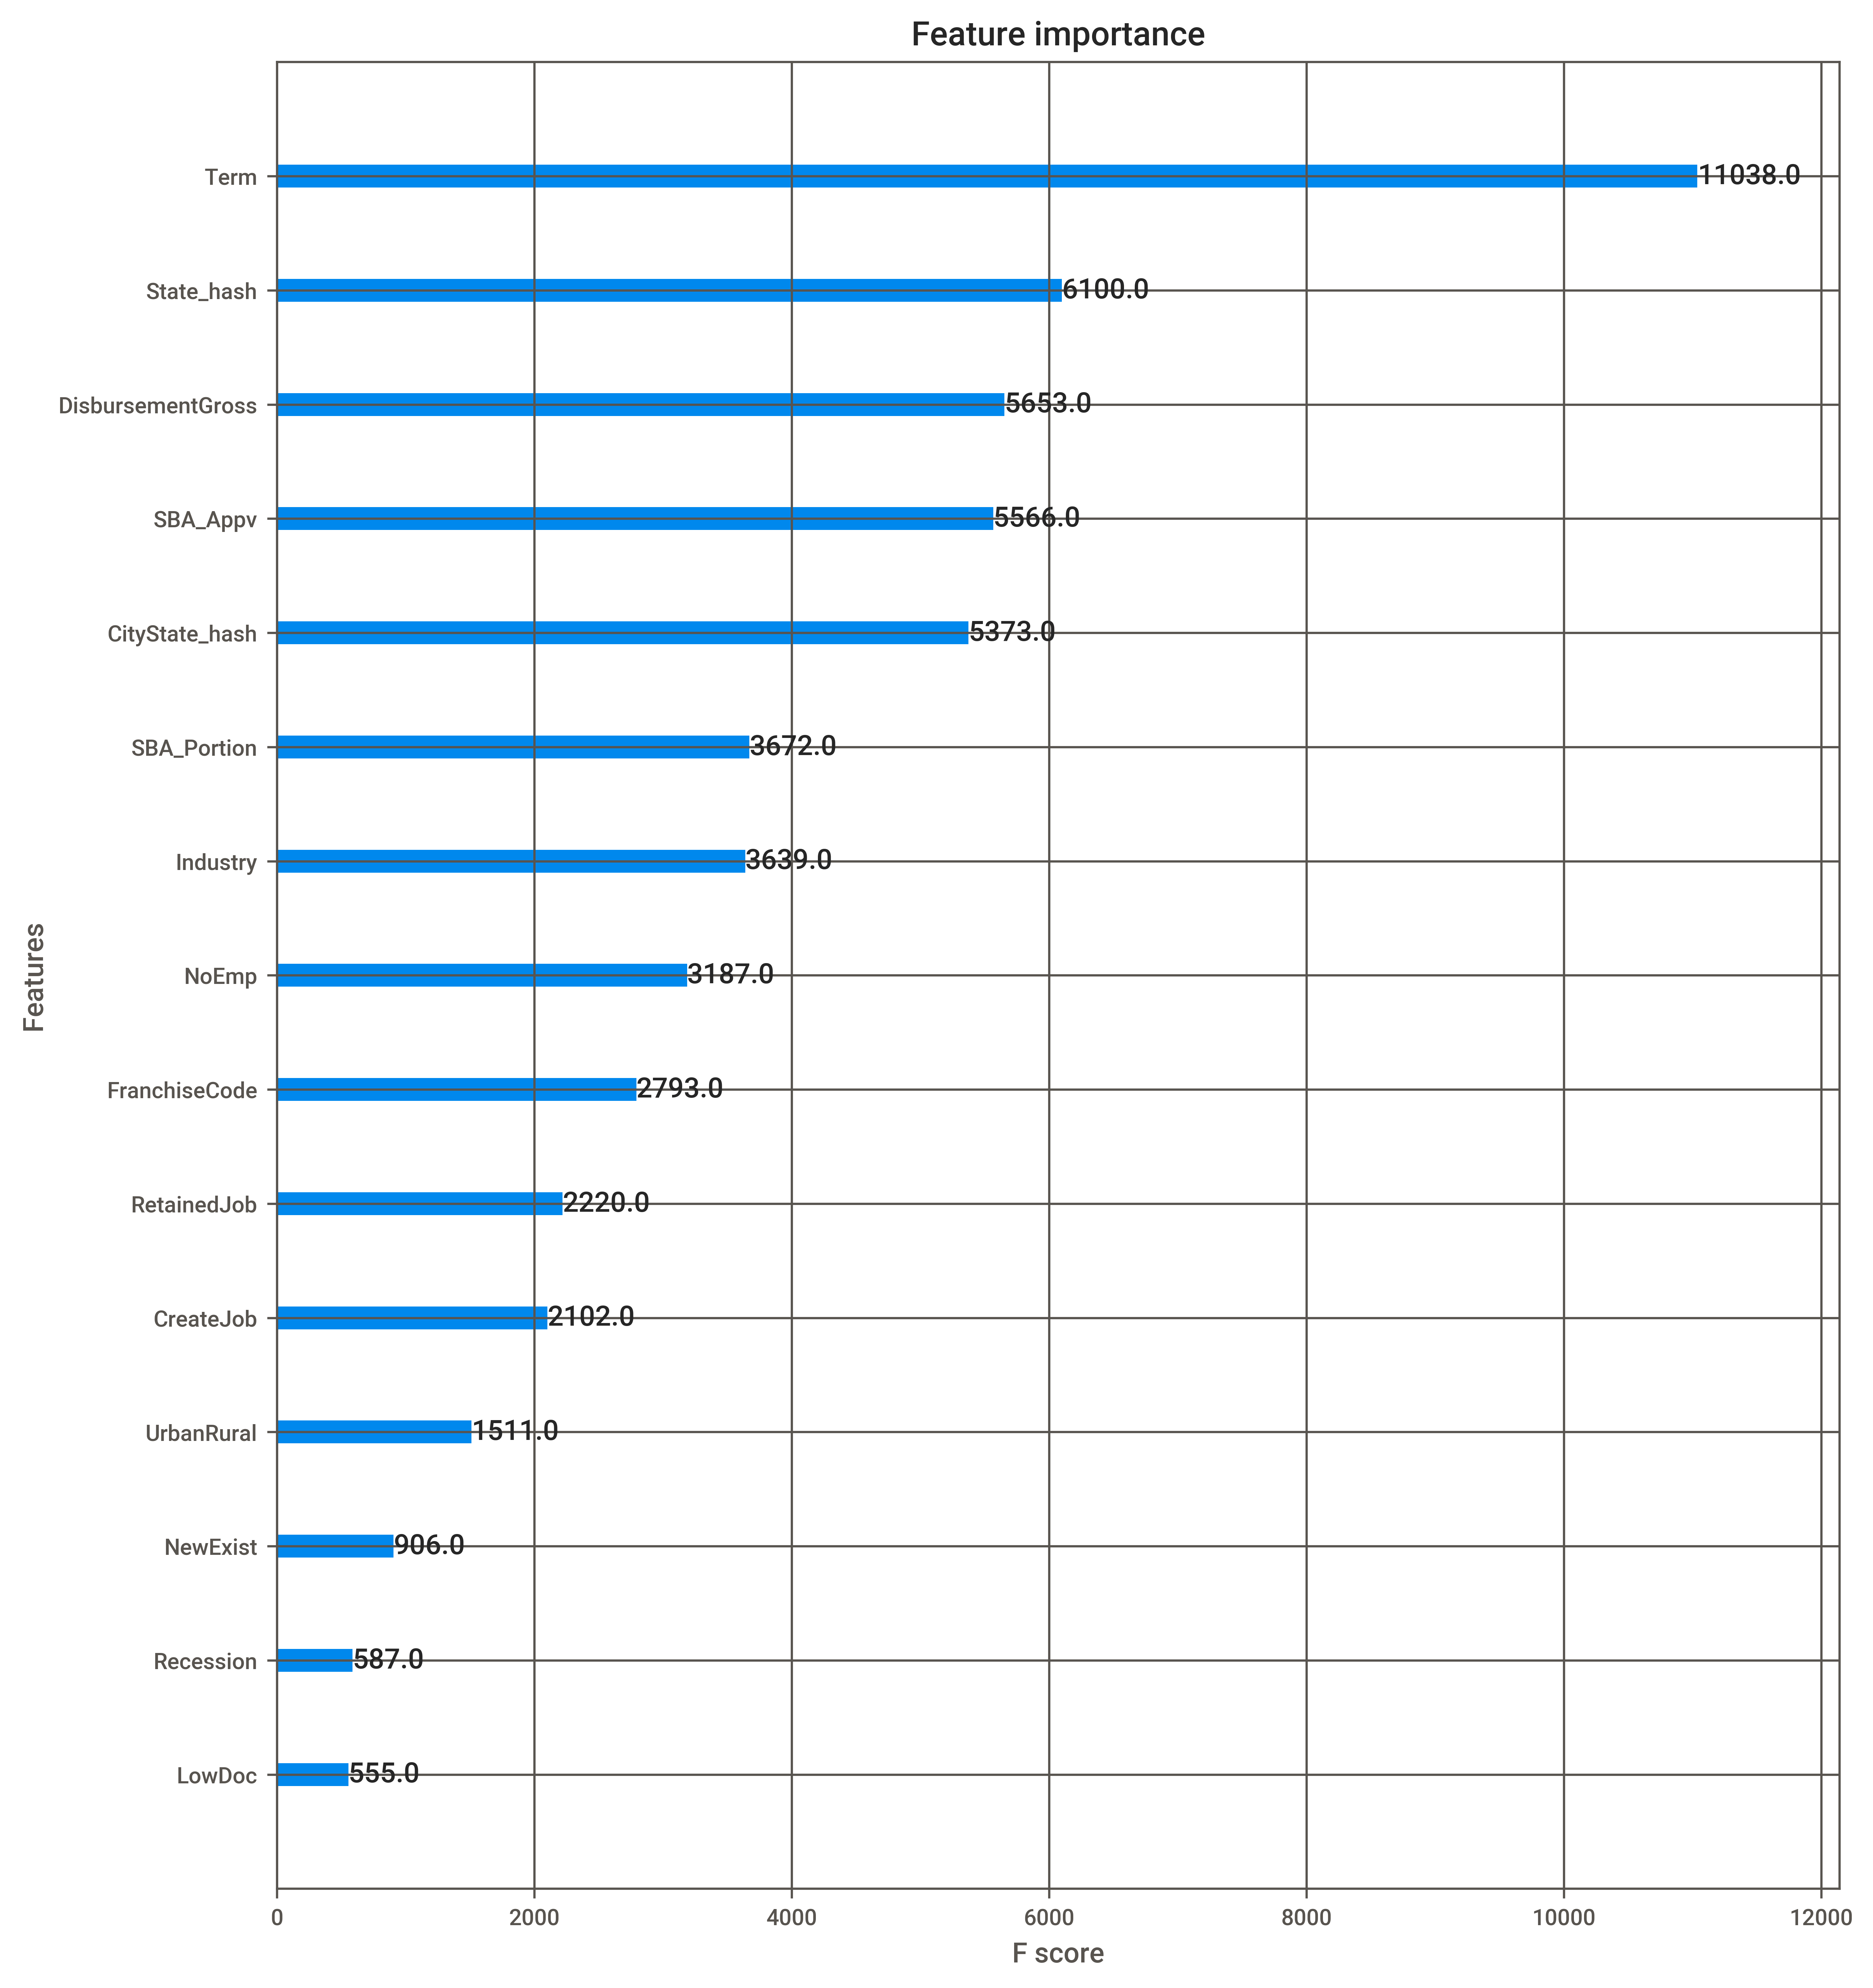

In [92]:
# Plot feature importance

plot_features(modelv2, (10,12))

<div class="alert alert-block alert-info">
    <b>Observation</b><br>
    I was hoping to see <b>Industry</b> at a much higher position here, but apparently the incomplete data on industry had an effect.<br><br>
Furthermore, <b>Recession</b> has to be at a very high position, but is at the bottom instead.  This could be due to <b>Recession</b> data being highly skewed towards 1 (Not Recession).<br><br>
<b>Real Estate</b> should have good importance too, but it may be highly skewed as well.

In [93]:
del modelv2
gc.collect()

0

<a id="model3"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.2.2 Model v3</h2>
    <b>Build a Model Dataset Excluding Year 2011 and Above</b>

We restrict the time frame to loans by excluding those disbursed after 2010 due to the fact the term of a loan is frequently 5 or more years.
       </div>

In [175]:
%%time

def RunModelv3():
    X = pd.read_feather(f'{savepath}sba_bef_2011.csv.feather')

    # Select target
    y = X.pop('MIS_Status')

    model3 = process_model(X, y)
    model3.osample()
    model3.split_data(0.7)
    model3_results = model3.prep_run_model("Metrics : SBA Before 2011 Oversampled")

    return model3_results
    
model3_results = RunModelv3()

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212

Shapes Before And After Splitting Dataset :
X (1428424, 16)   y (1428424,)
X_train (999896, 16)   y_train (999896,)
X_valid (214264, 16)   y_valid (214264,)
X_test (214264, 16)   y_test (214264,)

Please wait, Fitting model can take time ...
Fitting model completed.

Preparing PRedictions

Metrics : SBA Before 2011 Oversampled
MAE: 0.07271870216181907
RMSE: 0.26966405426348367

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93    107092
           1       0.93      0.92      0.93    107172

    accuracy                           0.93    214264
   macro avg       0.93      0.93      0.93    214264
weighted avg       0.93      0.93      0.93    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 99712 times correctly   (92.4 %)
False Negative : CHGOFF 

<div class="alert alert-block alert-info">
    <b>We get a similar score to Model 2.</b>  Will use this dataset as the last dataset, for now.</div>

In [176]:
# Save 6 - final cleaned csv
def SaveFinalCsv():
    #sdf = pd.read_csv(f'{savepath}sba_bef_2011.csv')
    #sdf.to_csv(f'{savepath}sba_final.csv', index=False)
    
    src_file=f'{savepath}sba_bef_2011.csv.feather'
    dst_file=f'{savepath}sba_final.csv.feather'
    shutil.copy2(src_file, dst_file)

    print('saved to sba_final.csv.feather')

SaveFinalCsv()
(kaggle_flag == 1) and FileLink(r'sba_final.csv.feather')  # Kaggle only

saved to sba_final.csv.feather


False

In [177]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("SBA Machine Learning Model 3 completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

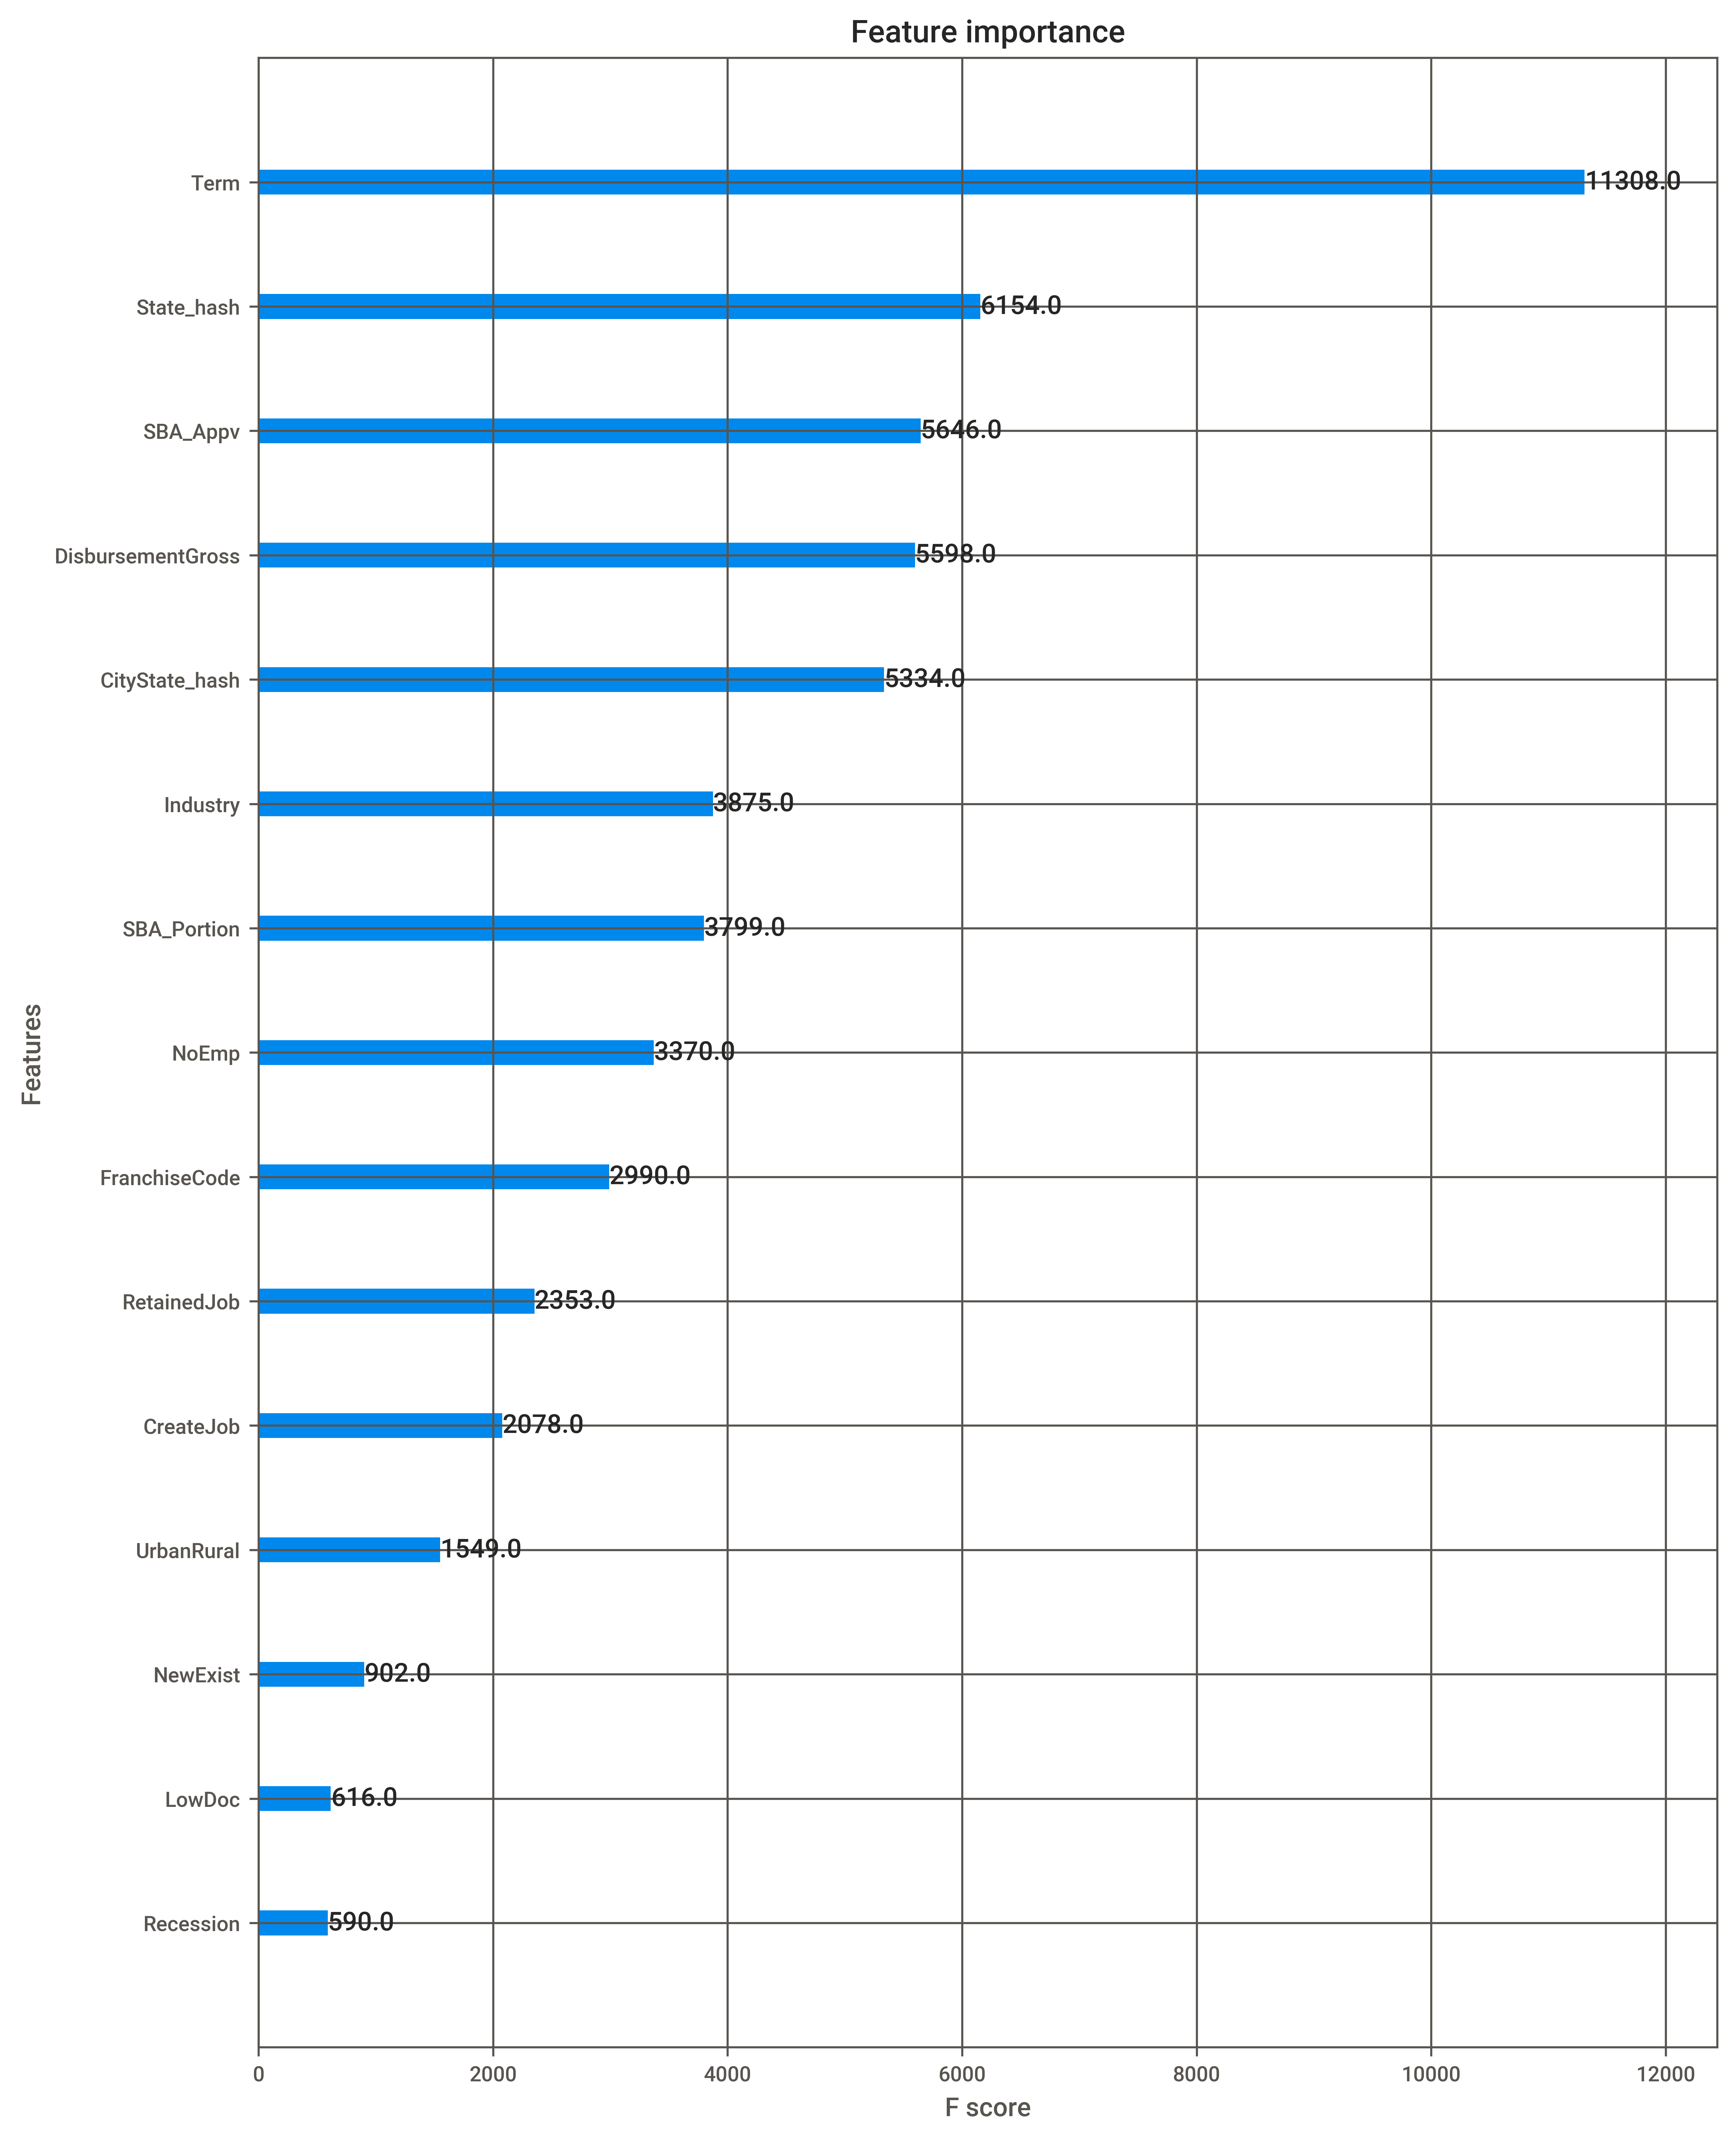

In [97]:
# Plot feature importance
modelv3 = model3_results['xg_model']
plot_features(modelv3, (10,14))

<a id="test_model"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>4. Test Model</h2>
    </div>
    

<a id="test_test_dataset"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>4.1 Test Model with Test Dataset</h2>
    Test Dataset was previously unseen by the model.
    </div>

In [98]:
def Modelv3WithTestData():
    X_test = model3_results['X_test']
    y_test = model3_results['y_test']
    
    # Get predictions
    predictions = modelv3.predict(X_test)
    model_eval(y_test, predictions);
    
Modelv3WithTestData()

MAE: 0.07141190307284472
RMSE: 0.26723005645481707

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93    107090
           1       0.93      0.92      0.93    107174

    accuracy                           0.93    214264
   macro avg       0.93      0.93      0.93    214264
weighted avg       0.93      0.93      0.93    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 99929 times correctly   (92.47 %)
False Negative : CHGOFF (0) was predicted 8140 times incorrectly     (7.53 %)
True Positive : P I F (1) was predicted 99034 times correctly     (93.26 %)
False Positive : P I F (1) was predicted 7161 times incorrectly     (6.74 %)

Accuracy for model: 92.86
f1-score: 
   CHGOFF (0) : 92.89
   P I F (1)  : 92.83


<a id="test_user_input"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>4.2 Test Model with User Input</h2>
    </div>

<div class="alert alert-block alert-info">So let's assume the following are <b>the entries of a user</b>, through a user interface, looking for a prediction from our model.</div>

In [99]:
def UserInputTest():
    # 16 entries
    user_input =   {'Term':50, 
                    'NoEmp':0,
                    'NewExist':1,
                    'CreateJob':0 ,          
                    'RetainedJob':0,         
                    'FranchiseCode':1,       
                    'UrbanRural':0,           
                    'LowDoc':0,               
                    'DisbursementGross':50000,                 
                    'SBA_Appv':25000,          
                    'Industry':71, 
                    'Recession':0,
                    'RealEstate':0,           
                    'SBA_Portion':50,
                    'City':'EVANSVILLE',
                    'State':'IN'
                   }

    city = user_input['City']
    state = user_input['State']
    city_state = f'{city}_{state}'

    state_hash = int(hashlib.sha1(('State' + "_" + \
                              str(state)).encode('utf-8')).hexdigest(), 16) % 900000
    city_state_hash = int(hashlib.sha1(('CityState' + "_" + \
                              str(city_state)).encode('utf-8')).hexdigest(), 16) % 900000

    print(f'State_hash = {state_hash}')
    print(f'CityState_hash = {city_state_hash}')

    user_input.pop('City')
    user_input.pop('State')
    user_input['State_hash'] = state_hash
    user_input['CityState_hash'] = city_state_hash

    user_input_list = list(user_input.values())
    
    return {'user_input':user_input, 'user_input_list':user_input_list}

user_input_param = UserInputTest()

print()
print(f"{color.bold}User Entry:{color.end}")
user_input_param['user_input']

State_hash = 705173
CityState_hash = 717067

User Entry:


{'Term': 50,
 'NoEmp': 0,
 'NewExist': 1,
 'CreateJob': 0,
 'RetainedJob': 0,
 'FranchiseCode': 1,
 'UrbanRural': 0,
 'LowDoc': 0,
 'DisbursementGross': 50000,
 'SBA_Appv': 25000,
 'Industry': 71,
 'Recession': 0,
 'RealEstate': 0,
 'SBA_Portion': 50,
 'State_hash': 705173,
 'CityState_hash': 717067}

In [100]:
# User Input test 1
def UserInputTest1():
    features = np.array([user_input_param['user_input_list']])   

    # using inputs to predict the output
    pred = modelv3.predict(features)
    if pred[0] == 1:
        print(f'{color.bdblue}Prediction: Approve The Loan{color.end}')
    else:
        print(f'{color.bdred}Prediction: Do Not Approve The Loan{color.end}')
        
UserInputTest1()

Prediction: Do Not Approve The Loan


In [101]:
# User Input test 2
def UserInputTest2():
    '''
    # if one wants to edit the list from the previous cell
    user_input2_list = user_input_list[:]   # make a copy
    user_input2_list[0] = 500          # change term 
    '''

    user_input2 = copy.deepcopy(user_input_param['user_input'])
    user_input2['Term'] = 500     # change term
    user_input2_list = list(user_input2.values())

    features = np.array([user_input2_list]) 

    # using inputs to predict the output
    pred = modelv3.predict(features)
    if pred[0] == 1:
        print(f'{color.bdblue}Prediction: Approve The Loan{color.end}')
    else:
        print(f'{color.bdred}Prediction: Do Not Approve The Loan{color.end}')
        
UserInputTest2()

Prediction: Approve The Loan


<div style="font-family: Trebuchet MS;background-color:HoneyDew;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;border: 5px solid CadetBlue;"><b>Predictions:</b><br>
    
- 1 -> can approve<br>
- 0 -> do not approve<br>

Of course, in real life, will need to check further using other data (e.g. financial statements, kind of real estate, etc.) or other data's models if available.

In [102]:
del user_input_param
gc.collect()

0

<a id="mutual_info"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>5. Mutual Information Scores</h2>
 "A general-purpose metric, normally used before selecting and building a model, but used here in the end, for comparison.  Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships."
    </div>

In [103]:
%%time

def GetMIScores():
    X = pd.read_feather(f'{savepath}sba_final.csv.feather')

    # Select target
    y = X.pop('MIS_Status')

    model_mi = process_model(X, y)
    osample_xy = model_mi.osample()
    mi_scores = make_mi_scores(osample_xy['X_over'], osample_xy['y_over'])

    print()
    return mi_scores

mi_scores = GetMIScores()

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212

Please wait, Mutual Information gathering can take time ...
Mutual Information gathering done ...

Wall time: 4min 26s


In [104]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("SBA Mutual Information completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

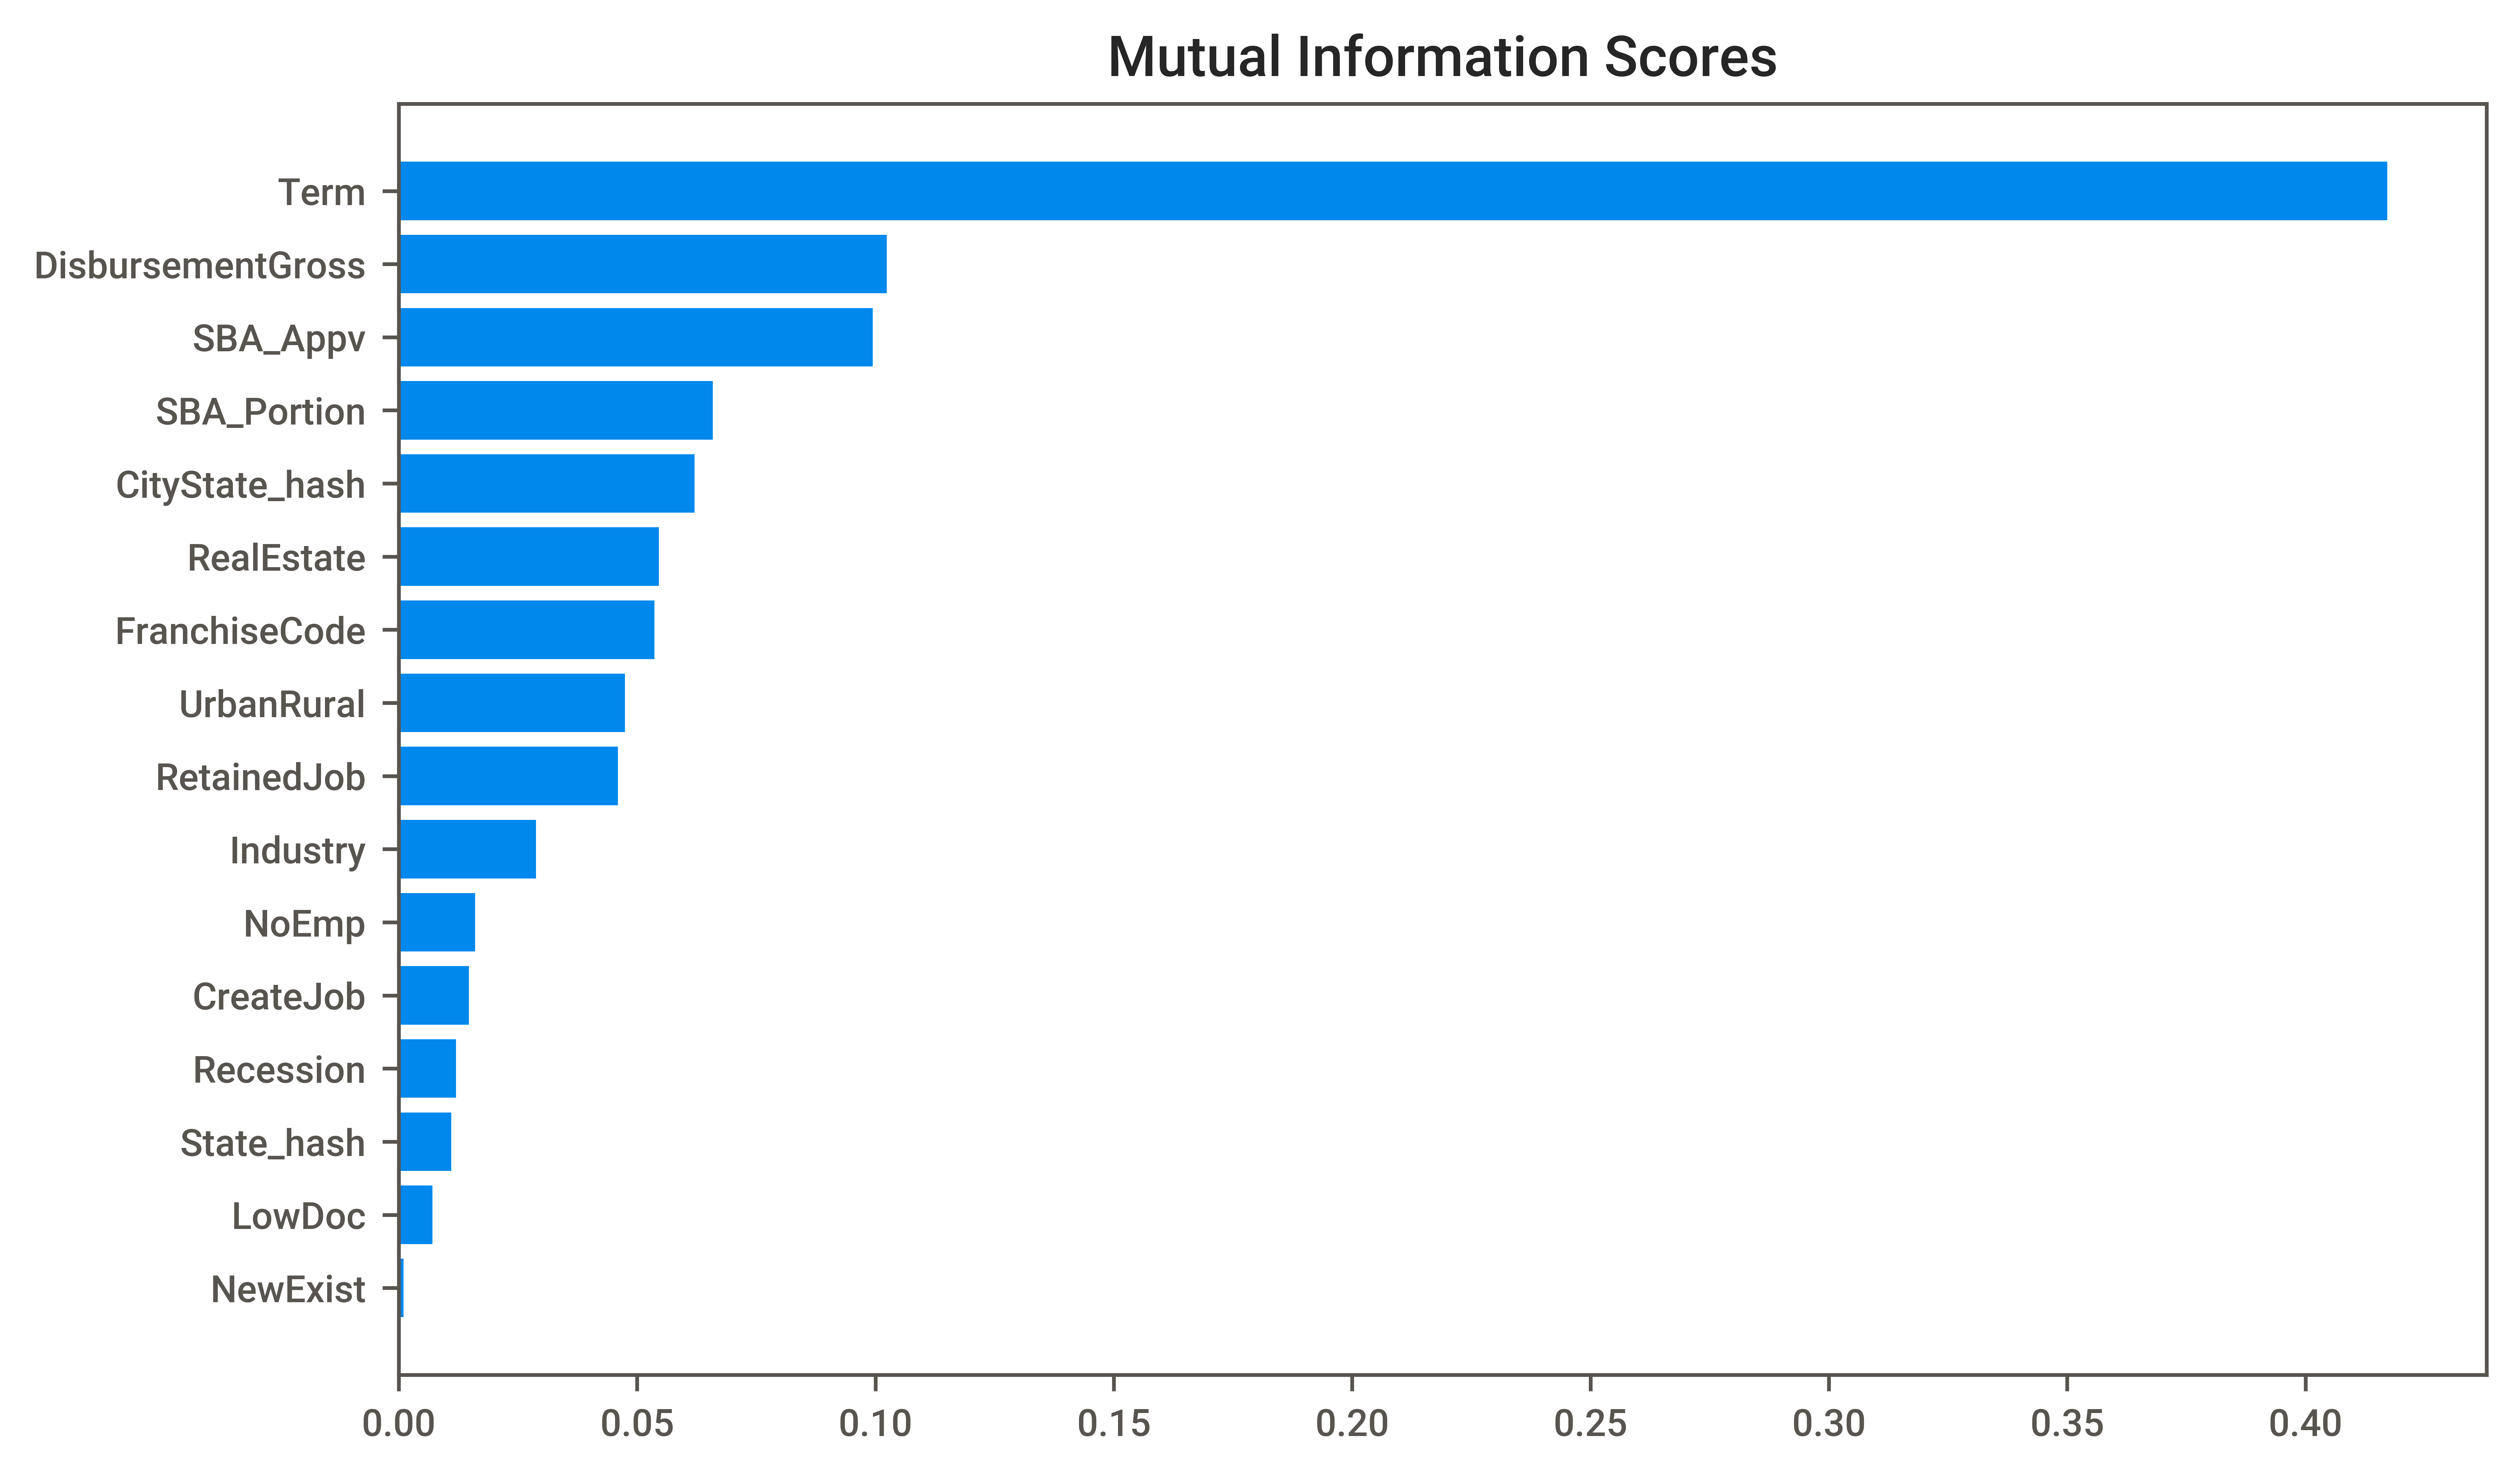

In [105]:
plt.figure(dpi=1200, figsize=(8, 5))
plot_mi_scores(mi_scores)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

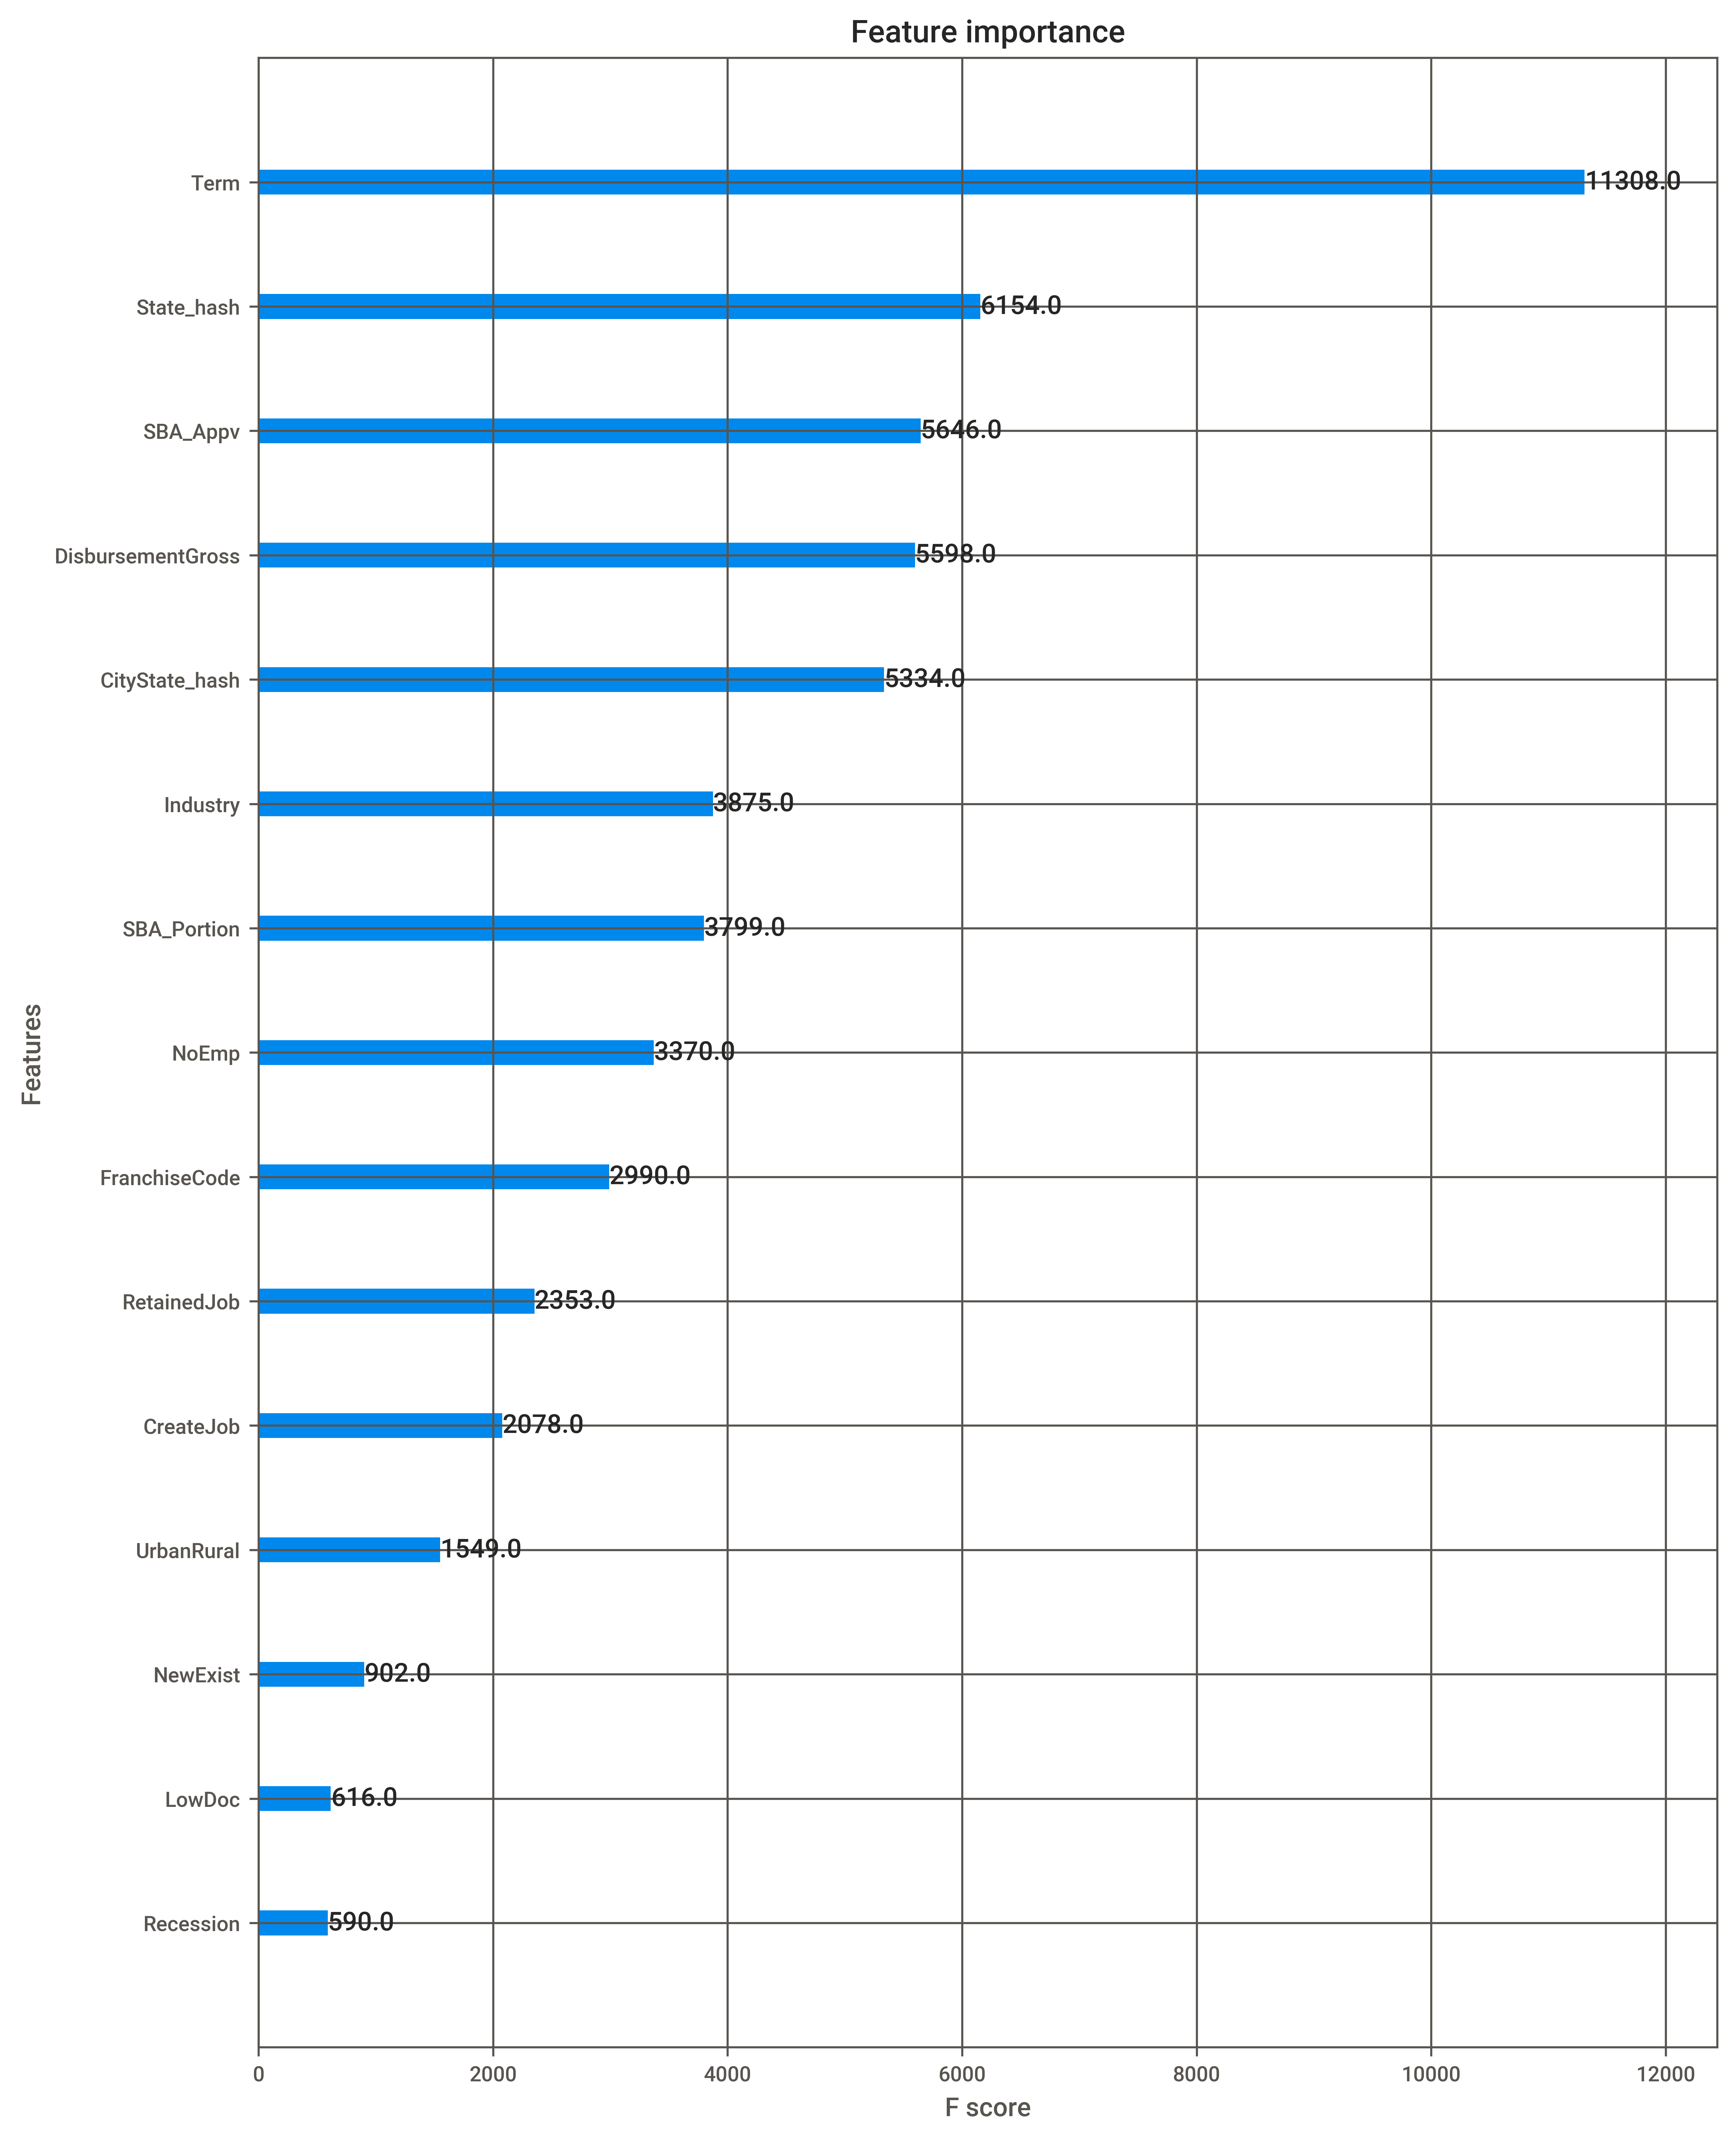

In [106]:
# Plot feature importance
plot_features(modelv3, (10,14))

In [107]:
del mi_scores
gc.collect()

4603

<div class="alert alert-block alert-info">
The importance ranked by <b>Mutual Information</b> and <b>XGBoost Feature Importance</b> metrics are different.  Which ranking do you think is more reasonable ?</div>

<a id="trim_dataset"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>6. Trim Dataset</h2><br>
After the preprocessing and encoding steps, not all of the features may be useful in forecasting the loan default. Alternatively we can select the <b>top 5 or top 8 features</b>, based on the feature importance plot above, which had a major contribution in forecasting loan defaults.<br><br>

If the model performance is similar in both the cases, that is – by using all the features and by using 5-8 features, then we should use only the top 8 features, in order to keep the model simpler and more efficient.

The idea is to have a less complex model without compromising on the overall model performance.
</div>

In [108]:
X = pd.read_feather(f'{savepath}sba_final.csv.feather')
print(X.shape)

# Select target
y = X.pop('MIS_Status')

#Let's retain the top 8 from Mutual Information metric 
mi_features = ['Term', 'DisbursementGross', 'SBA_Appv', 'SBA_Portion',\
                'CityState_hash', 'FranchiseCode', 'RealEstate', 'UrbanRural']

Xmi = X[mi_features]

#Let's retain the top 8 from Feature Importance metric 
fi_features = ['Term', 'SBA_Appv', 'DisbursementGross', 'CityState_hash', 'State_hash',\
                'SBA_Portion', 'Industry', 'NoEmp']

Xfi = X[fi_features]

(868663, 17)


In [109]:
%%time

def ModelMI():
    model_mi = process_model(Xmi, y)
    model_mi.osample()
    model_mi.split_data(0.7)
    model_mi_results = model_mi.prep_run_model("Mutual Information Metrics")

    print()
    return model_mi_results

model_mi_results = ModelMI()

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212

Shapes Before And After Splitting Dataset :
X (1428424, 8)   y (1428424,)
X_train (999896, 8)   y_train (999896,)
X_valid (214264, 8)   y_valid (214264,)
X_test (214264, 8)   y_test (214264,)

Please wait, Fitting model can take time ...
Fitting model completed.

Preparing PRedictions

Mutual Information Metrics
MAE: 0.07942538177201956
RMSE: 0.2818250907425021

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92    107092
           1       0.92      0.92      0.92    107172

    accuracy                           0.92    214264
   macro avg       0.92      0.92      0.92    214264
weighted avg       0.92      0.92      0.92    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 99051 times correctly   (91.69 %)
False Negative : CHGOFF (0) was predict

In [110]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("Trimmed Dataset by Mutual Information completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

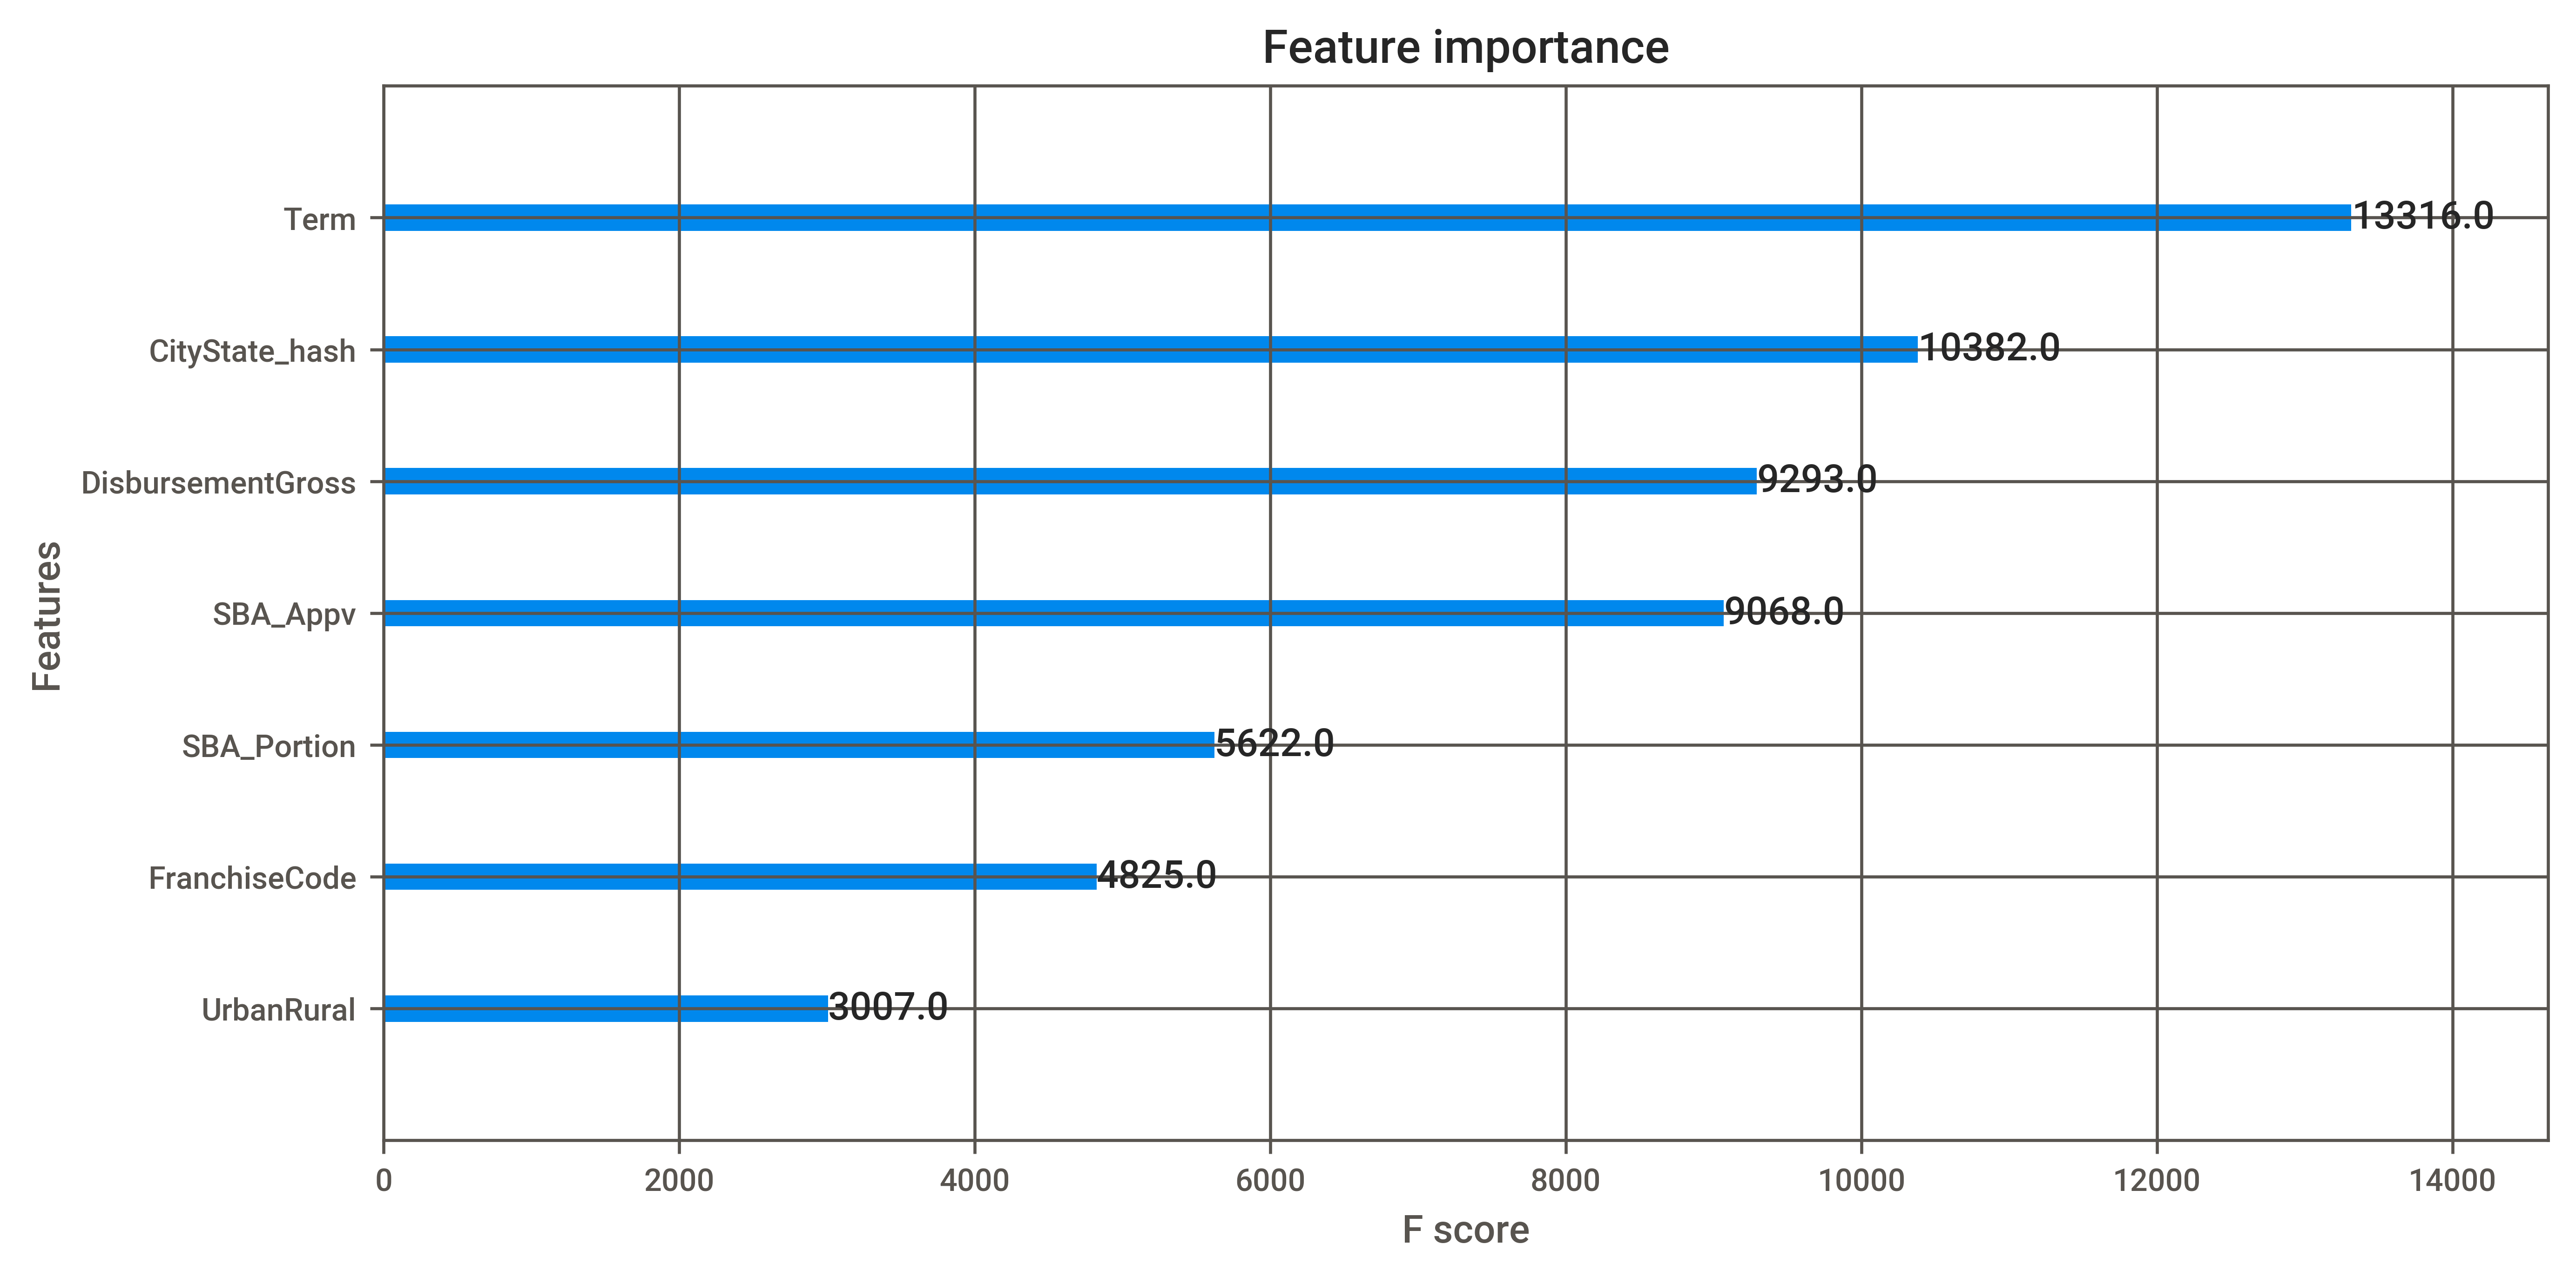

In [111]:
# Plot mutual information
my_model_mi = model_mi_results['xg_model']
plot_features(my_model_mi, (10,5))

In [112]:
# Test with Unseen test data
def MI_Model_On_Test_Data():
    X_test = model_mi_results['X_test']
    X_test_mi = X_test[mi_features]

    y_test = model_mi_results['y_test']

    predictions_mi = my_model_mi.predict(X_test_mi)
    model_eval(y_test, predictions_mi)
    print()
    
MI_Model_On_Test_Data()

MAE: 0.07903334204532726
RMSE: 0.28112869303101606

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92    107090
           1       0.92      0.92      0.92    107174

    accuracy                           0.92    214264
   macro avg       0.92      0.92      0.92    214264
weighted avg       0.92      0.92      0.92    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 99083 times correctly   (91.74 %)
False Negative : CHGOFF (0) was predicted 8927 times incorrectly     (8.26 %)
True Positive : P I F (1) was predicted 98247 times correctly     (92.46 %)
False Positive : P I F (1) was predicted 8007 times incorrectly     (7.54 %)

Accuracy for model: 92.10
f1-score: 
   CHGOFF (0) : 92.13
   P I F (1)  : 92.07



In [113]:
%%time

def ModelFI():
    model_fi = process_model(Xfi, y)
    model_fi.osample()
    model_fi.split_data(0.7)
    model_fi_results = model_fi.prep_run_model("Feature Importance Metrics")

    print()
    return model_fi_results
    
model_fi_results = ModelFI()

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212

Shapes Before And After Splitting Dataset :
X (1428424, 8)   y (1428424,)
X_train (999896, 8)   y_train (999896,)
X_valid (214264, 8)   y_valid (214264,)
X_test (214264, 8)   y_test (214264,)

Please wait, Fitting model can take time ...
Fitting model completed.

Preparing PRedictions

Feature Importance Metrics
MAE: 0.08303774782511295
RMSE: 0.28816271067768806

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92    107092
           1       0.92      0.92      0.92    107172

    accuracy                           0.92    214264
   macro avg       0.92      0.92      0.92    214264
weighted avg       0.92      0.92      0.92    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 98081 times correctly   (91.78 %)
False Negative : CHGOFF (0) was predic

In [114]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("Trimmed Dataset by Feature Importance completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

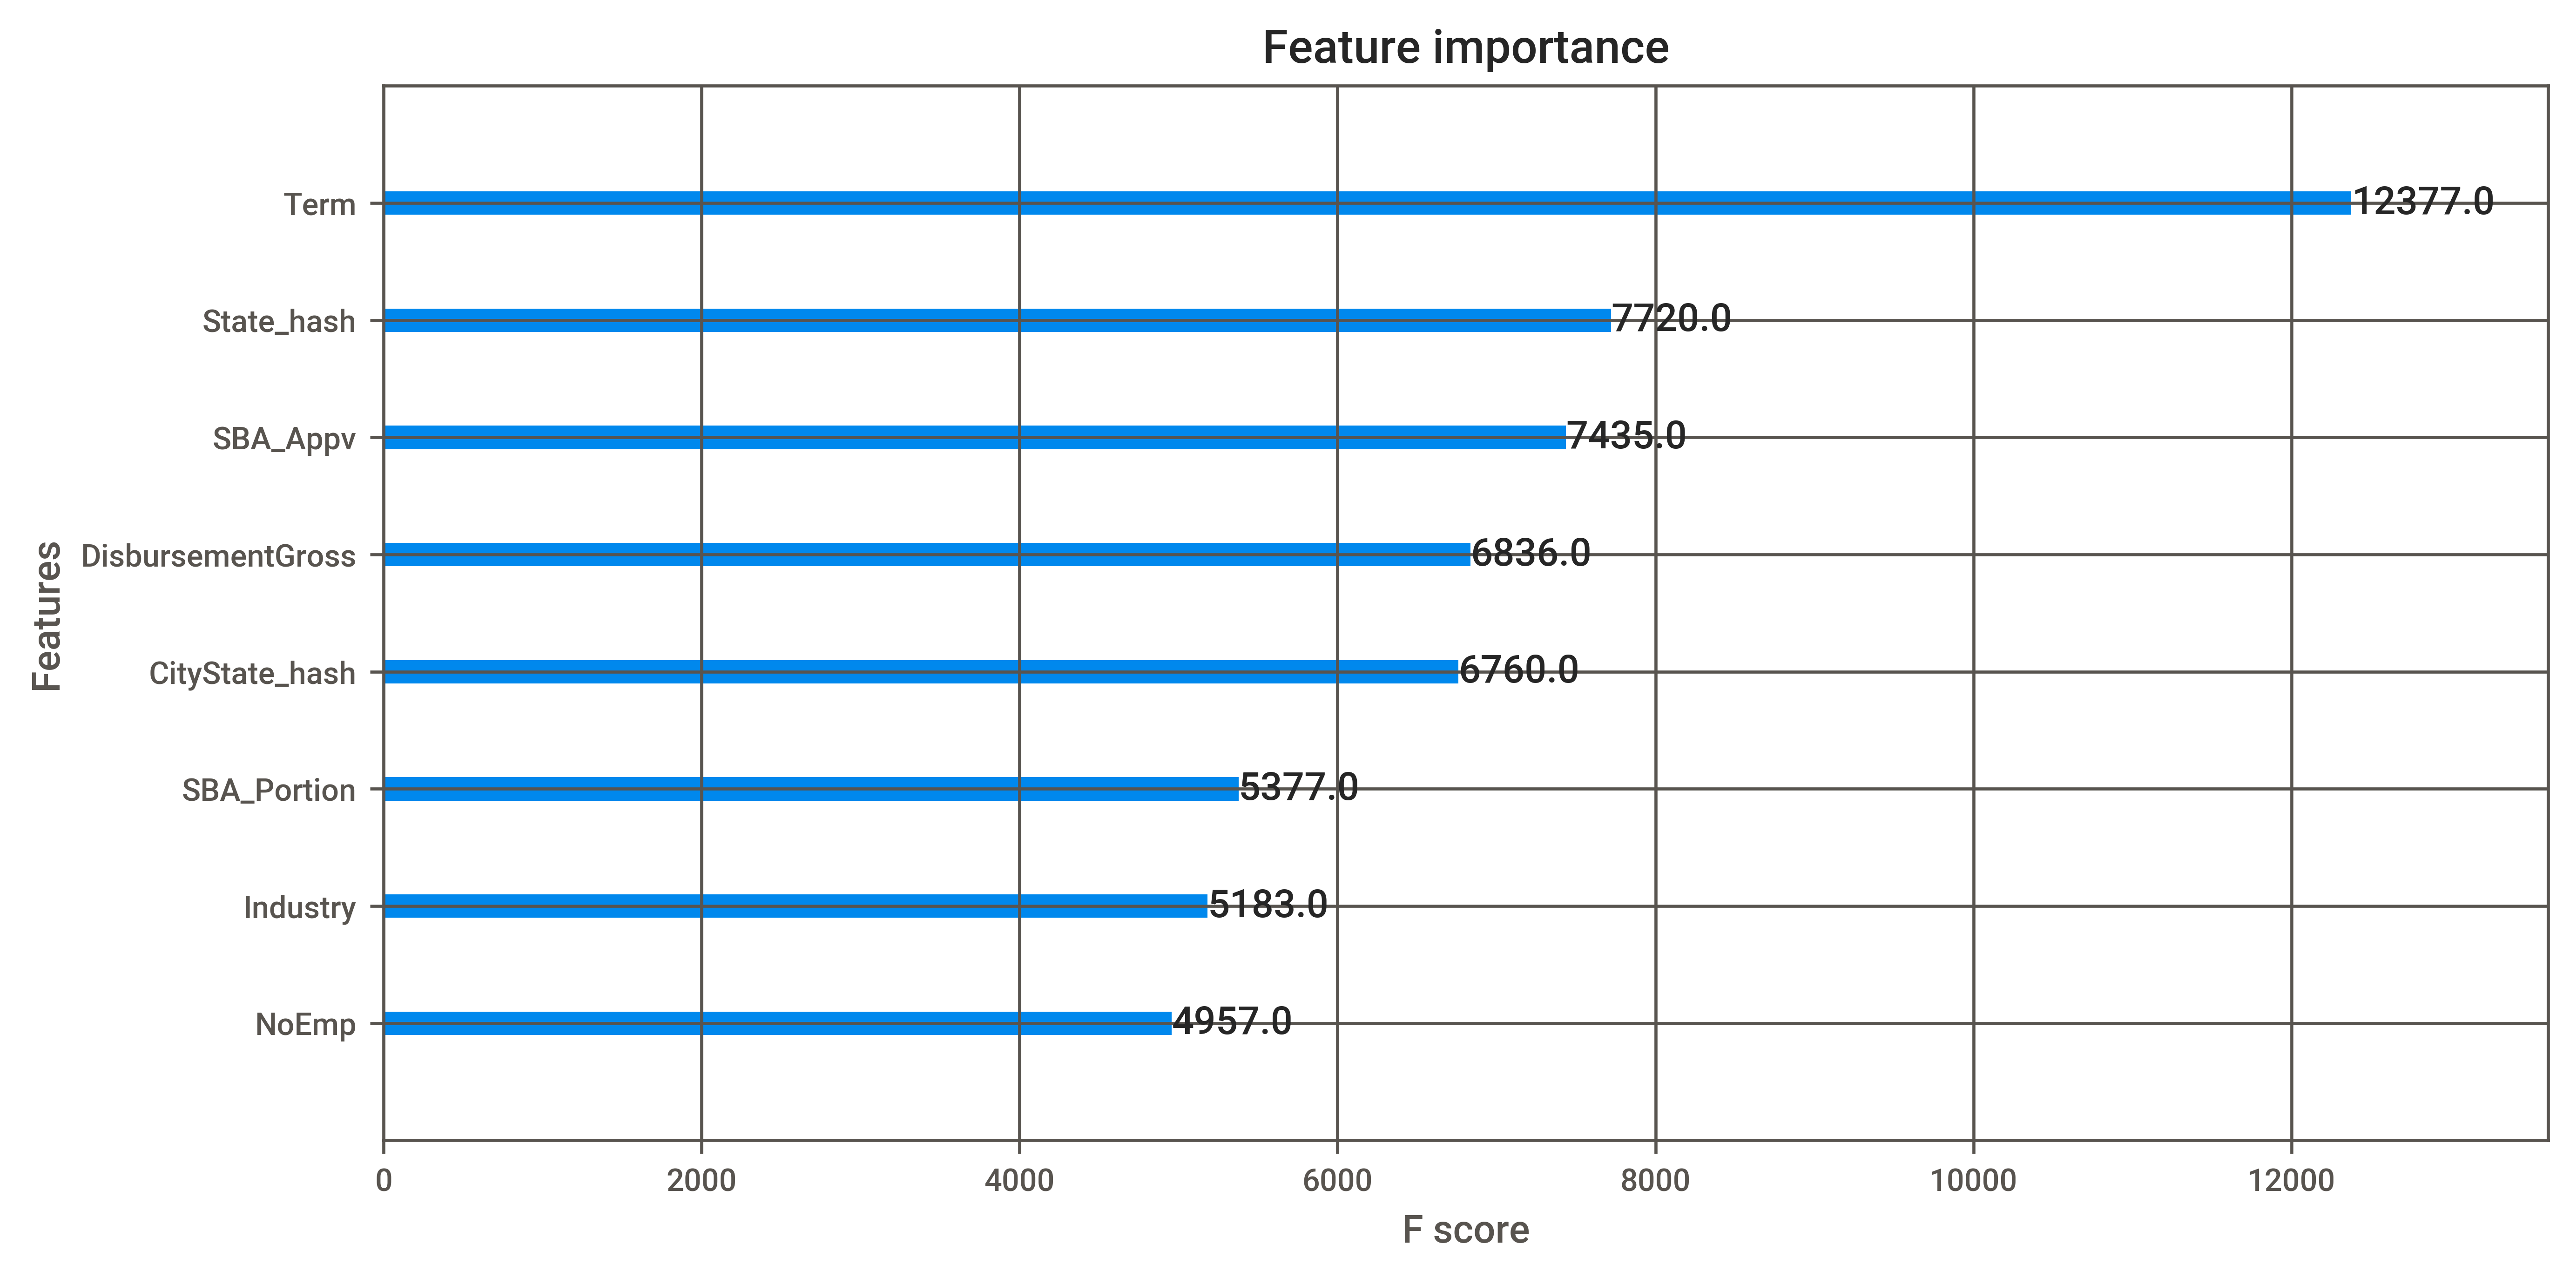

In [115]:
# Plot feature importance
my_model_fi = model_fi_results['xg_model']
plot_features(my_model_fi, (10,5))

In [116]:
# Test with Unseen test data
def FI_Model_On_Test_Data():
    X_test = model_fi_results['X_test']
    X_test_fi = X_test[fi_features]

    y_test = model_fi_results['y_test']

    predictions_fi = my_model_fi.predict(X_test_fi)
    model_eval(y_test, predictions_fi)
    print()
    
FI_Model_On_Test_Data()

MAE: 0.08185229436582907
RMSE: 0.2860983997959951

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92    107090
           1       0.92      0.92      0.92    107174

    accuracy                           0.92    214264
   macro avg       0.92      0.92      0.92    214264
weighted avg       0.92      0.92      0.92    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 98249 times correctly   (91.87 %)
False Negative : CHGOFF (0) was predicted 8697 times incorrectly     (8.13 %)
True Positive : P I F (1) was predicted 98477 times correctly     (91.76 %)
False Positive : P I F (1) was predicted 8841 times incorrectly     (8.24 %)

Accuracy for model: 91.81
f1-score: 
   CHGOFF (0) : 91.81
   P I F (1)  : 91.82



In [117]:
del X, y, Xmi, Xfi, mi_features, fi_features, my_model_mi, my_model_fi
del model_mi_results, model_fi_results
gc.collect()

0

<a id="results1"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>7. Full or Trimmed Dataset</h2>
</div>

<div class="alert alert-block alert-info">
    <b>Do we select the full dataset, or the trimmed dataset ?</b><br><br>
    <b>Observation:</b><br>
    <ul>
        <li><b>Accuracy</b> - Approx 2 points less accuracy of trimmed versus the full features dataset.<br><br>
        <li><b>f1-score</b> - Also approx 2 points less f1-score between full features dataset and Manual Information trimmed dataset.  Approx 1 point difference between full features dataset and Feature Importance trimmed dataset.<br><br>
    </ul>
    We can <b>stick with the full features</b> for now; but the trimmed features are also good, with the <b>Manual Information trimmed dataset</b> very slightly favored.

In [118]:
if alert_flag == 1:
    if kaggle_flag == 0:
        engine.say("SBA Machine Learning completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<a id="part3"></a>
<div style="font-family: Trebuchet MS;background-color:DarkRed;color:AliceBlue;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
<h1 style='color:GhostWhite;'>Part 3. XGBoost HyperParameter Tuning using Optuna</h1>
</div>

<a id="find_best_hp"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.1 Find The Best HyperParameter Combination</h2>
</div>

In [242]:
%%time

def OptunaStudy():
    X = pd.read_feather(final_ds)
    y = X.pop('MIS_Status')
    
    # instantiate the optuna_tuning class
    ot = optuna_tuning(X,y)
    ot.osample()    # oversample
    ot.split_data(0.7)
    
    del X, y
    gc.collect()
    
    ''' 
    Pass the number of trials or timeout in seconds to the run_optuna_trials method. 
    Example : 
        run_optuna_trials(n_trials = 50)          # number of trials
      or
        time_to_run = 60 * 60                     # 1 hour in seconds 
        run_optuna_trials(timeout = time_to_run)  # timeout, in seconds
    '''

    #study_results = ot.run_optuna_trials(n_trials=50,dfsets=ot_df)
    study_results = ot.run_optuna_trials(n_trials=50)

    print()
    return study_results

study_results = OptunaStudy()

X size :  868663
y size :  868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212

Shapes Before And After Splitting Dataset :
X (1428424, 16)   y (1428424,)
X_train (999896, 16)   y_train (999896,)
X_valid (214264, 16)   y_valid (214264,)
X_test (214264, 16)   y_test (214264,)


[I 2022-04-02 23:35:07,440] A new study created in memory with name: no-name-d8fc0629-0c7c-433d-91da-fb29b83506b2


Please wait, finding best trial ...


[I 2022-04-02 23:44:46,850] Trial 0 finished with value: 0.2540417415247324 and parameters: {'lambda': 0.0019817973936455623, 'alpha': 0.054113409157046204, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 79}. Best is trial 0 with value: 0.2540417415247324.
[I 2022-04-02 23:50:22,482] Trial 1 finished with value: 0.27841789036302306 and parameters: {'lambda': 6.547304732208894, 'alpha': 5.380991383969201, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.008, 'max_depth': 7, 'random_state': 48, 'min_child_weight': 216}. Best is trial 0 with value: 0.2540417415247324.


Number of completed trials: 2
Best trial: {'lambda': 0.0019817973936455623, 'alpha': 0.054113409157046204, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 79}

Wall time: 15min 16s


In [48]:
best_trial = study_results.best_trial.params
best_trial.update({'n_estimators': 4000, 'tree_method':tree_method})
best_trial

{'lambda': 0.038840013385875706,
 'alpha': 3.125293524180442,
 'colsample_bytree': 0.4,
 'subsample': 0.7,
 'learning_rate': 0.009,
 'max_depth': 11,
 'random_state': 48,
 'min_child_weight': 1,
 'n_estimators': 4000,
 'tree_method': 'hist'}

In [147]:
# Trial results dataframe sorted from best value (RMSE) ascending
def ViewResultsAsDf():
    stdf = study_results.trials_dataframe()
    stdf = stdf.sort_values('value',ascending=True)

    return stdf.head(2)    # return here is only used for printing output

ViewResultsAsDf()

number     value             datetime_start          datetime_complete  \
6       6  0.842801 2022-04-02 04:24:38.963959 2022-04-02 04:27:21.160335   
8       8  0.843828 2022-04-02 04:31:42.558209 2022-04-02 04:35:36.938798   

                duration  params_rf_max_depth  params_rf_n_estimators   state  
6 0 days 00:02:42.196376                    5                     300  PRUNED  
8 0 days 00:03:54.380589                    5                     400  PRUNED

In [50]:
#Visualize parameter importance
optuna.visualization.plot_param_importances(study_results)

In [ ]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("Optuna run completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<a id="try_best_hp"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.2 Model v4 : Try the Optuna Hyperparameters</h2>
</div>

In [35]:
%%time

def RunModelv4():
    X = pd.read_feather(final_ds)
    y = X.pop('MIS_Status')

    model4 = process_model(X, y)
    model4.osample()
    model4.split_data(0.7)
    model4_results = model4.prep_run_model("Metrics : After Optuna Tuning", \
                                       hyperparams = best_trial)
    return model4_results

model4_results = RunModelv4()

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212

Shapes Before And After Splitting Dataset :
X (1428424, 16)   y (1428424,)
X_train (999896, 16)   y_train (999896,)
X_valid (214264, 16)   y_valid (214264,)
X_test (214264, 16)   y_test (214264,)

Please wait, Fitting model can take time ...
Fitting model completed.

Preparing Predictions

Metrics : After Optuna Tuning
MAE: 0.029809020647425605
RMSE: 0.1726528906431213

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    107165
           1       0.99      0.95      0.97    107099

    accuracy                           0.97    214264
   macro avg       0.97      0.97      0.97    214264
weighted avg       0.97      0.97      0.97    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 105896 times correctly   (95.39 %)
False Negative : CHGOFF (0) wa

In [ ]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("Model Test with Optuna completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<a id="optuna_results"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.3 Optuna Tuning Results</h2>
</div>

In [ ]:
def CompareResults():
    m3_clf_report = model3_results['eval_results']['ClassificationReport']

    m3_0_f1_score = round(m3_clf_report['0']['f1-score'] * 100, 2)
    m3_1_f1_score = round(m3_clf_report['1']['f1-score'] * 100, 2)
    m3_accuracy   = round(m3_clf_report['accuracy'] * 100, 2)


    m4_clf_report = model4_results['eval_results']['ClassificationReport']

    m4_0_f1_score = round(m4_clf_report['0']['f1-score'] * 100, 2)
    m4_1_f1_score = round(m4_clf_report['1']['f1-score'] * 100, 2)
    m4_accuracy   = round(m4_clf_report['accuracy'] * 100, 2)


    data = {'Model v3 : No Optuna':[m3_0_f1_score, m3_1_f1_score, m3_accuracy],
            'Model v4 : With Optuna':[m4_0_f1_score, m4_1_f1_score, m4_accuracy]}
 
    # Creates pandas DataFrame.
    df = pd.DataFrame(data, index =['0 : f1_score',
                                    '1 : f1_score',
                                    'Accuracy'])
    print(f'{color.bdgreen}\
    Accuracy Improvement Using Optuna Suggested Parameters: {round(m4_accuracy - m3_accuracy,2)}\
    {color.end}')
    return df

CompareResults()

In [ ]:
# do not run this if you still want to do more work with model 3 and model 4 information
del modelv3, model3_results, model4_results, best_trial, study_results
gc.collect()

<div class="alert alert-block alert-info">
    <b>Observation:</b><br><br>
    <b>The Accuracy and F1 scores after Optuna tuning are improved compared to before tuning;</b> but it all depends on what hyperparameters/values are given.  A few trial sessions may be needed.<br><br>
    We have a bigger score in our <a style="color:DarkSlateGrey" href="#pl_run">Pipeline</a> as we used an Optuna hyperparameter set that was obtained from another Optuna run.
  </div>

<a id="cross_validation"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>Cross Validation</h2><br>
Measure our model's quality, in RMSE.  Ideally for small datasets, but included here for reference.
</div>

In [77]:
%%time

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# This will take about an hour to run with our dataset, if no GPU used
def CrossVal():
    print(f'{color.bold}Please wait, this will take some time{color.end}')
    print()
    X = pd.read_feather(final_ds)
    y = X.pop('MIS_Status')

    model_cv = process_model(X, y)   # create object from XGBoost class
    model_cv.osample()  # oversample
    model_cv_df = model_cv.split_data(0.7)

    del X, y
    gc.collect()
    
    print()
    X_train, y_train = model_cv_df['X_train'], model_cv_df['y_train']
    X_valid, X_test = model_cv_df['X_valid'], model_cv_df['X_test']
    y_valid, y_test = model_cv_df['y_valid'], model_cv_df['y_test']
    
    # these hyperparameters came from the PipeLine, a result from Optuna tuning
    hyperparams = { 'lambda': 0.0011260613527792323,
                    'alpha': 0.18307583898121738,
                    'colsample_bytree': 0.5,
                    'subsample': 0.8,
                    'learning_rate': 0.02,
                    'max_depth': 11,
                    'random_state': 48,
                    'min_child_weight': 1,
                    'n_estimators': 4000,
                    'tree_method': tree_method}   

    xgb_model = XGBClassifier(**hyperparams, use_label_encoder = False, n_jobs=4)

    # If we pass a pipeline instead of a model to cross_val_score, fit_params won't be 
    # recognized
    fit_params={'early_stopping_rounds': 400, 
                'eval_metric': ['logloss'],
                'verbose': False,
                'eval_set': [(X_valid, y_valid)]
               }

    # Multiply by -1 since sklearn calculates *negative* RMSE
    print()
    scores = -1 * cross_val_score(xgb_model, X_train, y_train,
                                  cv=5,
                                  scoring='neg_root_mean_squared_error',
                                  fit_params = fit_params,
                                  verbose=15)
    print(f"{color.bdblue}Scores: {scores}{color.end}")
    print()
    print(f"{color.bdgreen}Root Mean Squared Error (Mean): {scores.mean()}")
    print()
    
CrossVal()

Please wait, this will take some time

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-0.180) total time= 7.9min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.9min remaining:    0.0s


[CV] START .....................................................................
[CV] END ............................... score: (test=-0.181) total time= 8.3min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 16.2min remaining:    0.0s


[CV] START .....................................................................
[CV] END ............................... score: (test=-0.182) total time= 8.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 24.8min remaining:    0.0s


[CV] START .....................................................................
[CV] END ............................... score: (test=-0.182) total time= 8.3min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 33.2min remaining:    0.0s


[CV] START .....................................................................
[CV] END ............................... score: (test=-0.181) total time= 8.3min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 41.5min remaining:    0.0s


Scores :  [0.18023122 0.18122544 0.18229107 0.18180439 0.18140605]

Root Mean Squared Error (Mean): 0.18139163438503214

Wall time: 41min 35s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 41.5min finished


<a id="part4"></a>
<div style="font-family: Trebuchet MS;background-color:DarkRed;color:AliceBlue;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
<h1 id="part1" style='color:GhostWhite;'>Part 4. Miscellaneous</h1>
</div>

<a id="early_stopping_rounds"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>4.1 Early Stopping Rounds</h2>
</div>

<div class="alert alert-block alert-info">
    Below is a reference on using plots to get an insight on the value to use for XGBoost's early_ stopping_rounds during fitting.</div>

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212

Shapes Before And After Splitting Dataset :
X (1428424, 16)   y (1428424,)
X_train (999896, 16)   y_train (999896,)
X_valid (214264, 16)   y_valid (214264,)
X_test (214264, 16)   y_test (214264,)
Please wait, Fitting model can take time ...
Fitting model completed.

Preparing Predictions

Metrics:
MAE: 0.03019639323451443
RMSE: 0.1737710943583956

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    107165
           1       0.99      0.95      0.97    107099

    accuracy                           0.97    214264
   macro avg       0.97      0.97      0.97    214264
weighted avg       0.97      0.97      0.97    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 105811 times correctly   (95.39 %)
False Negative : CHGOFF (0) was predicted 5116 times 

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


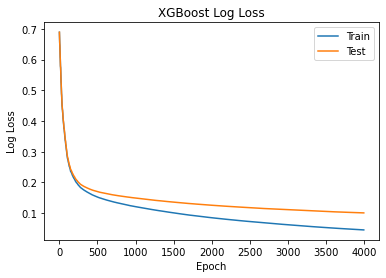

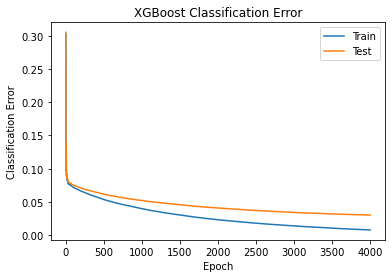

In [134]:
%%time

from matplotlib import pyplot

def PlotEarlyStoppingRounds():
    X = pd.read_feather(final_ds)
    y = X.pop('MIS_Status')
    
    model_esr = process_model(X, y)
    model_esr.osample()     # oversample
    model_esr_df = model_esr.split_data(0.7)
     
    print(f"{color.bold}Please wait, Fitting model can take time ...{color.end}")
            
    hyperparams = {'lambda': 0.0011260613527792323,
                    'alpha': 0.18307583898121738,
                    'colsample_bytree': 0.5,
                    'subsample': 0.8,
                    'learning_rate': 0.02,
                    'max_depth': 11,
                    'random_state': 48,
                    'min_child_weight': 1,
                    'n_estimators': 4000,
                    'tree_method': tree_method}   

    xg_model = XGBClassifier(**hyperparams,use_label_encoder =False, n_jobs=4)
       
    eval_setparam = [(model_esr_df['X_train'], model_esr_df['y_train']),\
                     (model_esr_df['X_valid'], model_esr_df['y_valid'])]
       
    # fit the model without specifying early_stopping_rounds
    xg_model.fit(model_esr_df['X_train'], model_esr_df['y_train'], 
                eval_metric=['error','logloss'],
                eval_set = eval_setparam,
                verbose=False)
 
    print("Fitting model completed.")
    print()
    print('Preparing Predictions')
    
    # Get predictions
    predictions = xg_model.predict(model_esr_df['X_valid'])
    
    print()
    print(f'{color.underline}Metrics:{color.end}')

    eval_results = model_eval(model_esr_df['y_valid'], predictions)

    # retrieve performance metrics
    results = xg_model.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)

    # what we will be looking for are the bottom areas of the plots
    
    # plot log loss
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    pyplot.xlabel('Epoch')
    pyplot.ylabel('Log Loss')
    pyplot.title('XGBoost Log Loss')
    pyplot.show()

    # plot classification error
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    pyplot.xlabel('Epoch')
    pyplot.ylabel('Classification Error')
    pyplot.title('XGBoost Classification Error')
    pyplot.show()
    
PlotEarlyStoppingRounds()

<div class="alert alert-block alert-info">
    From both plots, we can see that 10% of 4000 n_estimator, 400, is a good candidate as the early_stopping_rounds parameter.
</div>

<a id="random_forest_classifier"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>4.2 Random Forest Classifier</h2><br>
</div>

<div class="alert alert-block alert-info">
    This is just a reference on using a Random Forest Classifier.
  </div>

In [136]:
%%time

# run before tuning
def RunModelrf():
    X = pd.read_feather(final_ds)
    y = X.pop('MIS_Status')

    modelrf = other_models(X, y)
    modelrf.osample()
    modelrf.split_data(0.7)
    modelrf.prep_run_model("Metrics : Random Forest Classifier", modelname='rfc')

RunModelrf()

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212

Shapes Before And After Splitting Dataset :
X (1428424, 16)   y (1428424,)
X_train (999896, 16)   y_train (999896,)
X_valid (214264, 16)   y_valid (214264,)
X_test (214264, 16)   y_test (214264,)

Please wait, Fitting model can take time ...
Fitting model completed.

Preparing Predictions

Metrics : Random Forest Classifier
MAE: 0.11128327670537282
RMSE: 0.33359148176380765

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89    107165
           1       0.90      0.88      0.89    107099

    accuracy                           0.89    214264
   macro avg       0.89      0.89      0.89    214264
weighted avg       0.89      0.89      0.89    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 96135 times correctly   (88.24 %)
False Negative : CHGOFF (0

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Optuna Tuning for Random Forest</b>
</div>

In [150]:
%%time

# Importing the Packages:
from sklearn import linear_model
from sklearn import datasets
from sklearn import model_selection

# Define an objective function to be maximized.
def objective(trial, model_rf_df):

    # classifier_name = trial.suggest_categorical("classifier", ["LogReg", "RandomForest"])
    classifier_name = "RandomForest"
    
    # Setup values for the hyperparameters:
    if classifier_name == 'LogReg':
        logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
        classifier_obj = linear_model.LogisticRegression(C=logreg_c)
    else:
        rf_n_estimators = trial.suggest_categorical("n_estimators", [100,200,300,400])
        rf_max_depth = trial.suggest_categorical("max_depth", [5,10,15])
        classifier_obj = RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=rf_n_estimators
        )

    #for step in range(20):
    step = 0
    classifier_obj.fit(model_rf_df['X_train'], model_rf_df['y_train'])
        
    # Report intermediate objective value.
    intermediate_value = classifier_obj.score(model_rf_df['X_valid'], model_rf_df['y_valid'])
    trial.report(intermediate_value, step)

    # Handle pruning based on the intermediate value.
    if trial.should_prune():
        raise optuna.TrialPruned()
    return intermediate_value

def RandomForestOptunaTuning():
    #Grabbing a sklearn Classification dataset:
    X = pd.read_feather(final_ds)
    y = X.pop('MIS_Status')
    
    model_rf = other_models(X, y)
    model_rf.osample()     # oversample
    model_rf_df = model_rf.split_data(0.7)

    classes = list(set(y))
    print(classes)

    del X, y
    gc.collect()
    
    print(f'{color.bold}Please wait, this will take time{color.end}')
    study = optuna.create_study(direction="maximize")
    
    study.optimize(lambda trial: objective(trial, model_rf_df), n_trials=20,\
                   gc_after_trial=True, catch=(RuntimeWarning,ArithmeticError,))

    # Calculating the pruned and completed trials
    pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
    complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

    print("  Number of finished trials: ", len(study.trials))
    print("  Number of pruned trials: ", len(pruned_trials))
    print("  Number of complete trials: ", len(complete_trials))
    
    return study

study_results = RandomForestOptunaTuning()

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212


[I 2022-04-02 09:14:30,294] A new study created in memory with name: no-name-d9cf7772-6361-4d1a-b9b0-226d64d7514d



Shapes Before And After Splitting Dataset :
X (1428424, 16)   y (1428424,)
X_train (999896, 16)   y_train (999896,)
X_valid (214264, 16)   y_valid (214264,)
X_test (214264, 16)   y_test (214264,)
[0, 1]


[I 2022-04-02 09:23:43,542] Trial 0 finished with value: 0.9152587462196169 and parameters: {'n_estimators': 400, 'max_depth': 15}. Best is trial 0 with value: 0.9152587462196169.
[I 2022-04-02 09:28:58,221] Trial 1 finished with value: 0.8885440391292985 and parameters: {'n_estimators': 300, 'max_depth': 10}. Best is trial 0 with value: 0.9152587462196169.
[I 2022-04-02 09:39:02,706] Trial 2 finished with value: 0.9156274502482918 and parameters: {'n_estimators': 400, 'max_depth': 15}. Best is trial 2 with value: 0.9156274502482918.
[I 2022-04-02 09:45:56,925] Trial 3 finished with value: 0.8883340178471418 and parameters: {'n_estimators': 300, 'max_depth': 10}. Best is trial 2 with value: 0.9156274502482918.
[I 2022-04-02 09:50:02,954] Trial 4 finished with value: 0.844915618115969 and parameters: {'n_estimators': 400, 'max_depth': 5}. Best is trial 2 with value: 0.9156274502482918.
[I 2022-04-02 09:54:47,256] Trial 5 pruned. 
[I 2022-04-02 09:57:50,643] Trial 6 pruned. 
[I 2022-04-0

  Number of finished trials:  20
  Number of pruned trials:  6
  Number of complete trials:  14
Wall time: 1h 36min 59s


In [151]:
best_trial = study_results.best_trial.params
best_trial

{'n_estimators': 100, 'max_depth': 15}

In [152]:
# Trial results dataframe sorted from best value ascending
ViewResultsAsDf()

number     value             datetime_start          datetime_complete  \
17      17  0.843025 2022-04-02 10:46:35.854692 2022-04-02 10:47:28.614695   
7        7  0.844850 2022-04-02 09:57:50.644605 2022-04-02 09:58:44.523476   

                 duration  params_max_depth  params_n_estimators   state  
17 0 days 00:00:52.760003                 5                  100  PRUNED  
7  0 days 00:00:53.878871                 5                  100  PRUNED

In [153]:
#Visualize parameter importance
optuna.visualization.plot_param_importances(study_results)

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Random Forest Score With Optuna Hyperparameters</b>
</div>

In [154]:
%%time

def RunModelrf2():
    X = pd.read_feather(final_ds)
    y = X.pop('MIS_Status')

    modelrf = other_models(X, y)
    modelrf.osample()
    modelrf.split_data(0.7)
    modelrf.prep_run_model("Metrics : Random Forest Classifier", \
                            modelname='rfc', hparams = best_trial)

RunModelrf2()

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212

Shapes Before And After Splitting Dataset :
X (1428424, 16)   y (1428424,)
X_train (999896, 16)   y_train (999896,)
X_valid (214264, 16)   y_valid (214264,)
X_test (214264, 16)   y_test (214264,)

Please wait, Fitting model can take time ...
Fitting model completed.

Preparing Predictions

Metrics : Random Forest Classifier
MAE: 0.08574468879513124
RMSE: 0.2928219404264838

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92    107165
           1       0.93      0.90      0.91    107099

    accuracy                           0.91    214264
   macro avg       0.91      0.91      0.91    214264
weighted avg       0.91      0.91      0.91    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 99636 times correctly   (90.19 %)
False Negative : CHGOFF (0)

In [ ]:
del study_results, best_trial
gc.collect()

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>RandomizedSearchCV</b>
</div>

<div class="alert alert-block alert-info">
    Below is a reference on using a <b>RandomizedSearchCV</b> first for Random Forest hyperparameter tuning.<br><br>
  Once done, one would have randomly narrowed down some parameters which we can base our inputs for a full <b>GridSearchCV</b> (not shown here).
    <br><br>
    Both approaches take an <b>extremely long time to run</b> using our SBA dataset, and the line to run the task is commented out.  Uncomment if you want to try.  Otherwise, <b>Optuna</b> is a much faster method.</div>

In [ ]:
def ViewDefaultRFCParams():
    rf = RandomForestClassifier(random_state = 48)
    # Look at parameters used by our current forest
    print('Default parameters in use:\n')
    pprint(rf.get_params())

ViewDefaultRFCParams()

In [112]:
from sklearn.model_selection import RandomizedSearchCV

def SuggestRFCParams():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2000, num = 3)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(6, 15, num = 4)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    pprint(random_grid)
    return random_grid

random_grid = SuggestRFCParams()

{'bootstrap': [True, False],
 'max_depth': [6, 9, 12, 15, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [500, 1250, 2000]}


In [113]:
%%time

def RandomSearchCV(random_grid):
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestClassifier()

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, \
                                   n_iter = 5, cv = 3, verbose=10, random_state=48)

    # Fit the random search model
    rf_random.fit(modelrf_results['X_train'], modelrf_results['y_train'])
    
    return rf_random.best_params_

#rf_best_params = RandomSearchCV(random_grid)
#rf_best_params

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3; 1/5] START bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000
[CV 1/3; 1/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.956 total time=53.5min
[CV 2/3; 1/5] START bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000
[CV 2/3; 1/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.956 total time=48.3min
[CV 3/3; 1/5] START bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000
[CV 3/3; 1/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.956 total time=45.3min
[CV 1/3; 2/5] START bootstrap=False, max_depth=9, max_f

ModuleNotFoundError: No module named 'sklearn.utils._pprint'

ModuleNotFoundError: No module named 'sklearn.utils._pprint'

In [ ]:
del random_grid #,rf_best_params 
gc.collect()